In [26]:
# important packages
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

#### Reading the data into dataframe

In [28]:
import pandas as pd
from io import StringIO

# Load the data from the attachment string

# Read the CSV data into a DataFrame
# Use only rows with data (non-empty rows)
df = pd.read_csv('dataframe.csv')
# Remove rows where all stock price columns are NaN
price_columns = [col for col in df.columns if any(keyword in col for keyword in ['open', 'close', 'high', 'low'])]
df = df.dropna(subset=price_columns, how='all')
df.head()

,Tick,$CARD open,$CARD close,$CARD high,$CARD low,$CARD volume,$CARD index,$CARD mid,$LOGN open,$LOGN close,...,$GARR volume,$GARR index,$GARR mid,$SIMP open,$SIMP close,$SIMP high,$SIMP low,$SIMP volume,$SIMP index,$SIMP mid
2,352086,100612.0,100668.0,100871.0,100532.0,0.0,351.0,100647.0,98838.0,98826.0,...,0.0,351.0,98880.0,98428.0,98482.0,98681.0,98350.0,0.0,351.0,98462.0
12,353085,100682.0,100577.0,100744.0,100522.0,0.0,352.0,100647.0,98759.0,98838.0,...,0.0,352.0,98938.0,98369.0,98267.0,98430.0,98213.0,0.0,352.0,98335.0
22,354086,100791.0,100713.0,100940.0,100119.0,0.0,353.0,100777.0,98751.0,98777.0,...,0.0,353.0,98854.0,98476.0,98399.0,98621.0,97819.0,0.0,353.0,98462.0
32,355086,100184.0,100298.0,100609.0,100163.0,0.0,354.0,100258.0,98634.0,98728.0,...,0.0,354.0,98878.0,98375.0,98262.0,98429.0,97991.0,0.0,354.0,98335.0
42,356086,100655.0,100605.0,100717.0,100539.0,0.0,355.0,100647.0,98788.0,98784.0,...,0.0,355.0,98883.0,98216.0,98167.0,98277.0,98103.0,0.0,355.0,98208.0


## Volatility 
Now let's calculate simple volatility

In [29]:
stocks = ['$CARD', '$LOGN', '$HEST', '$JUMP', '$GARR', '$SIMP']
volatility_data = {}

average_volatility = {}
for stock in stocks:
    high_col = f'{stock} high'
    low_col = f'{stock} low'
    open_col = f'{stock} open'
    valid_rows = df[(df[high_col] > 0) & (df[low_col] > 0) & (df[open_col] > 0)]
    if not valid_rows.empty:
        volatility = (valid_rows[high_col] - valid_rows[low_col]) / valid_rows[open_col]
        average_volatility[stock] = volatility.mean()
    else:
        average_volatility[stock] = None

average_volatility

{'$CARD': np.float64(0.0031331656458445235),
 '$LOGN': np.float64(0.0030959467826498833),
 '$HEST': np.float64(0.0031330733852309237),
 '$JUMP': np.float64(0.0031331706062193783),
 '$GARR': np.float64(0.003133005278255879),
 '$SIMP': np.float64(0.003133095843650569)}

## Volatility 2
Let's calculate realized volatility

In [30]:
price_columns = [col for col in df.columns if 'open' in col or 'close' in col]
df_clean = df.dropna(subset=price_columns, how='all')

# Calculate daily returns for each stock based on close prices
returns = {}
for stock in ['$CARD', '$LOGN', '$HEST', '$JUMP', '$GARR', '$SIMP']:
    close_col = f'{stock} close'
    df_clean[close_col] = pd.to_numeric(df_clean[close_col], errors='coerce')
    returns[stock] = df_clean[close_col].pct_change()

# Calculate realized volatility as annualized standard deviation of daily returns
# Assuming 252 trading days in a year
realized_vol = {}
for stock in returns:
    realized_vol[stock] = np.sqrt(252) * returns[stock].std()

realized_vol

{'$CARD': np.float64(0.07598359642286699),
 '$LOGN': np.float64(0.0229937331260783),
 '$HEST': np.float64(0.019419983186576565),
 '$JUMP': np.float64(0.02282038856660232),
 '$GARR': np.float64(0.019846674635608394),
 '$SIMP': np.float64(0.02227763862257133)}

Some info about dataframe

In [31]:
df.describe()

,Tick,$CARD open,$CARD close,$CARD high,$CARD low,$CARD volume,$CARD index,$CARD mid,$LOGN open,$LOGN close,...,$GARR volume,$GARR index,$GARR mid,$SIMP open,$SIMP close,$SIMP high,$SIMP low,$SIMP volume,$SIMP index,$SIMP mid
count,1.458000e+03,1458.000000,1458.000000,1458.000000,1458.000000,1458.0,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.0,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.0,1458.000000,1458.000000
mean,1.080587e+06,100048.192044,100049.567215,100223.521262,99910.066529,0.0,1079.500000,100066.337449,97084.391632,97085.962963,...,0.0,1079.500000,98470.725652,103638.278464,103634.802469,103815.951989,103491.268176,0.0,1079.500000,103654.586420
std,4.210326e+05,1368.715790,1367.649728,1372.339739,1368.818544,0.0,421.032659,1367.245103,1839.340076,1841.179721,...,0.0,421.032659,1054.073617,2454.772546,2450.114158,2457.050995,2450.274913,0.0,421.032659,2452.904192
min,3.520860e+05,96518.000000,96459.000000,96644.000000,96232.000000,0.0,351.000000,96574.000000,93399.000000,93426.000000,...,0.0,351.000000,95500.000000,97729.000000,97797.000000,97856.000000,97675.000000,0.0,351.000000,97829.000000
25%,7.163360e+05,99110.000000,99113.250000,99284.750000,98940.250000,0.0,715.250000,99100.000000,95404.250000,95404.500000,...,0.0,715.250000,97791.000000,102752.250000,102725.500000,102908.750000,102574.000000,0.0,715.250000,102748.000000
50%,1.080592e+06,100031.500000,100033.500000,100221.500000,99916.000000,0.0,1079.500000,100000.000000,96890.500000,96873.500000,...,0.0,1079.500000,98412.000000,103846.000000,103849.000000,104057.500000,103731.000000,0.0,1079.500000,103814.000000
75%,1.444836e+06,100982.250000,100980.250000,101131.500000,100834.500000,0.0,1443.750000,101038.000000,98757.500000,98765.500000,...,0.0,1443.750000,99292.000000,105397.250000,105363.500000,105541.250000,105217.000000,0.0,1443.750000,105435.000000
max,1.809085e+06,104328.000000,104354.000000,104396.000000,104312.000000,0.0,1808.000000,104352.000000,100813.000000,100800.000000,...,0.0,1808.000000,100460.000000,108067.000000,108013.000000,108514.000000,107909.000000,0.0,1808.000000,108053.000000


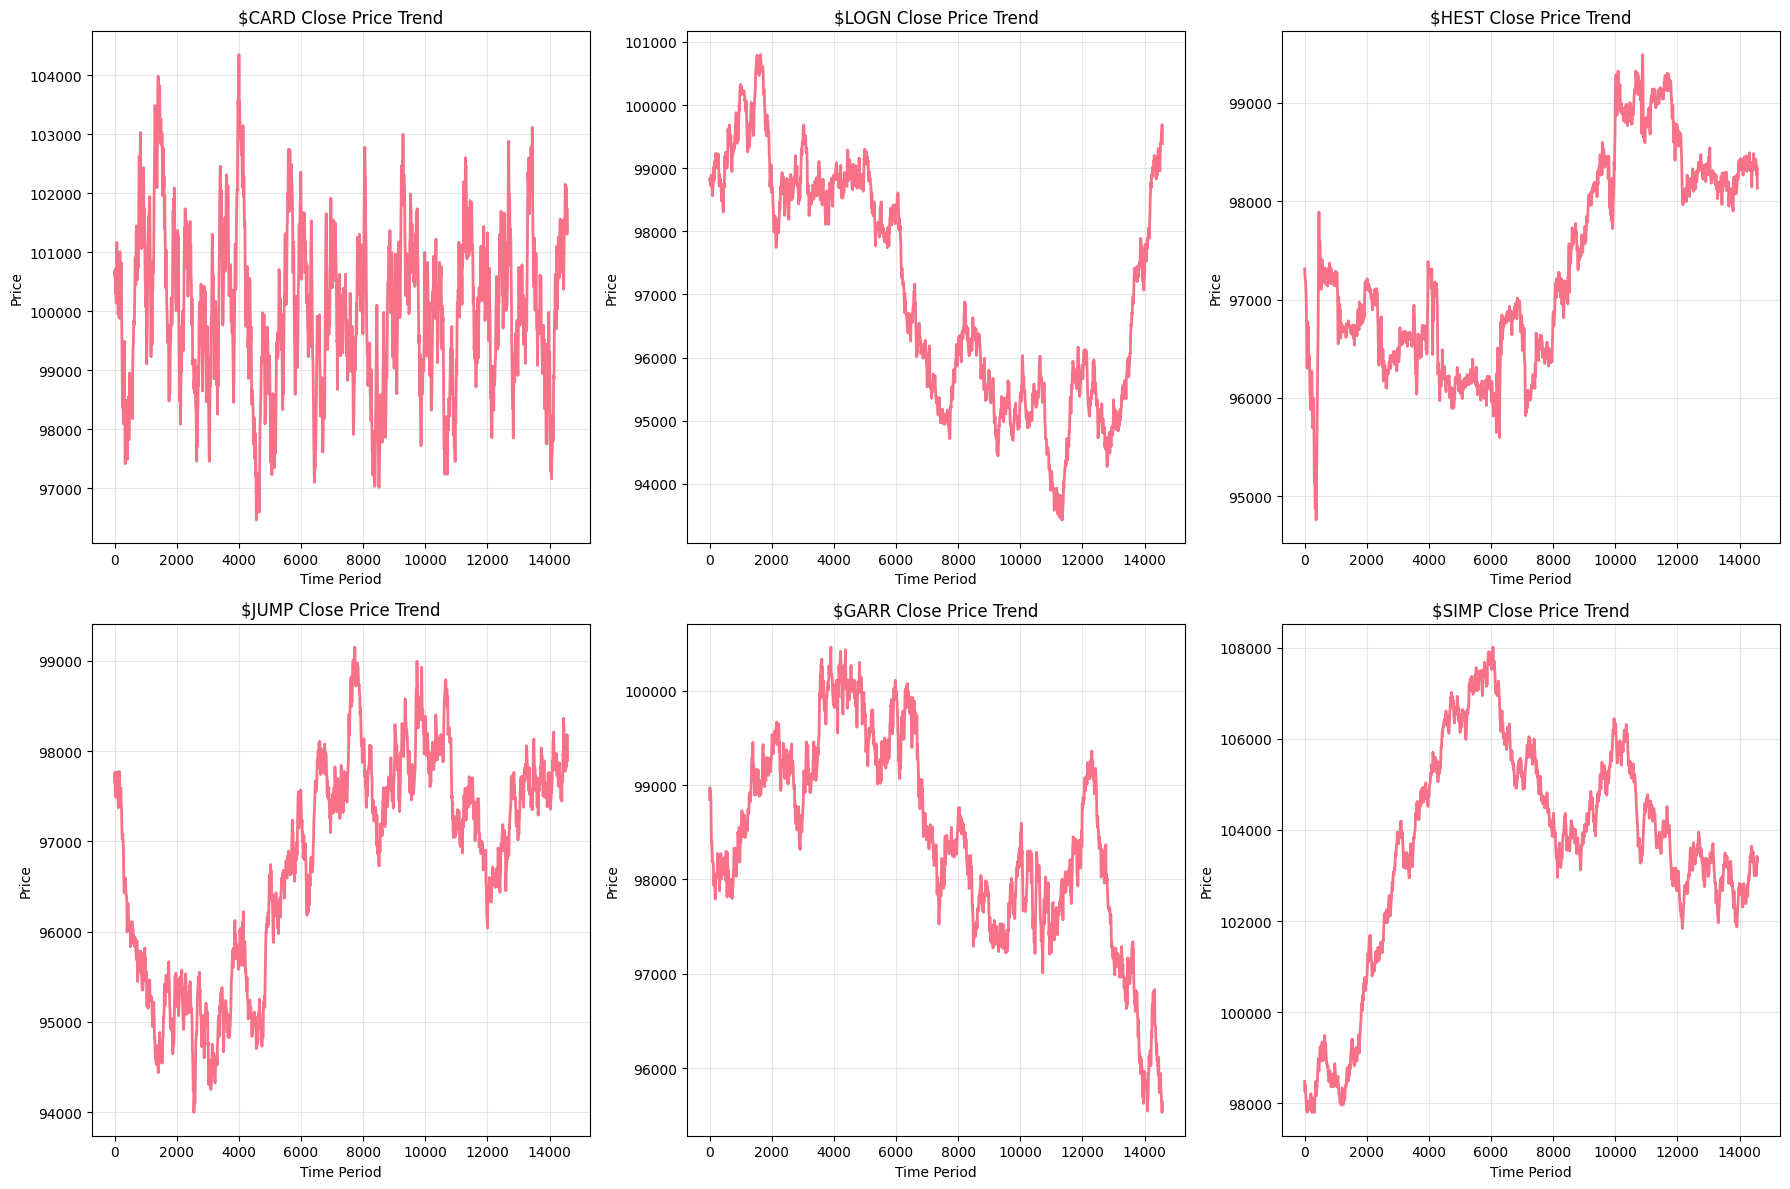

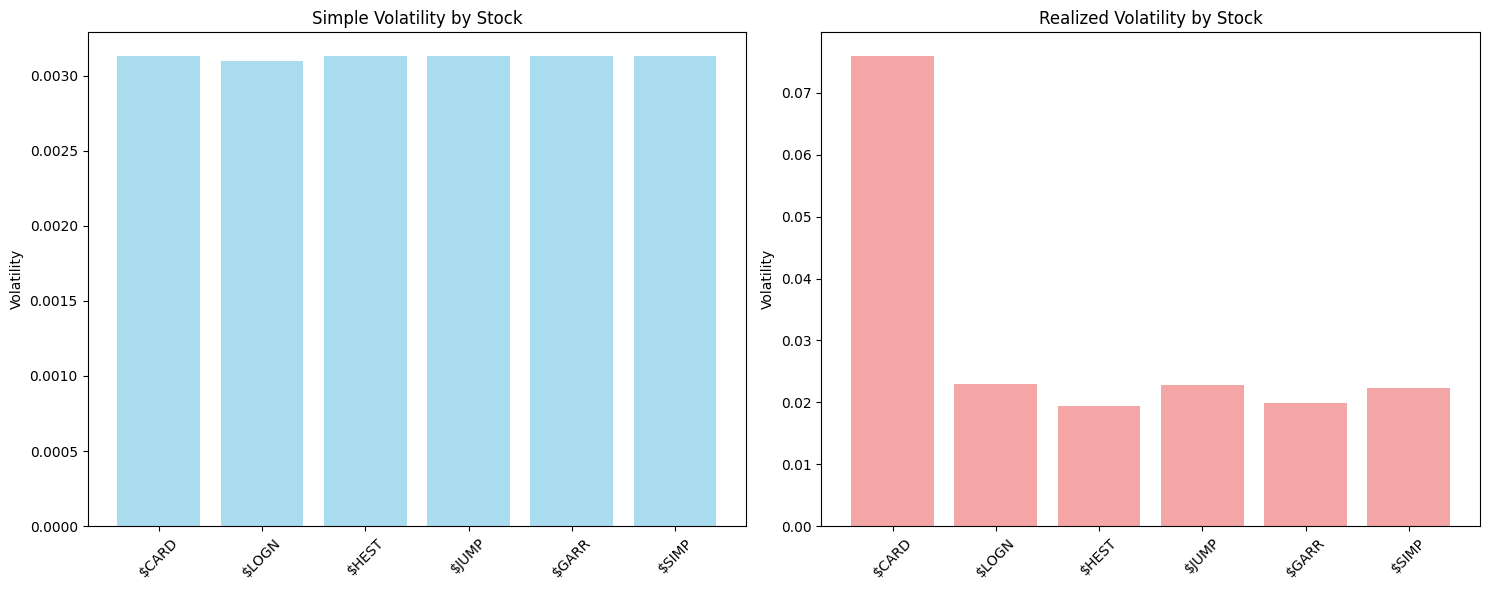

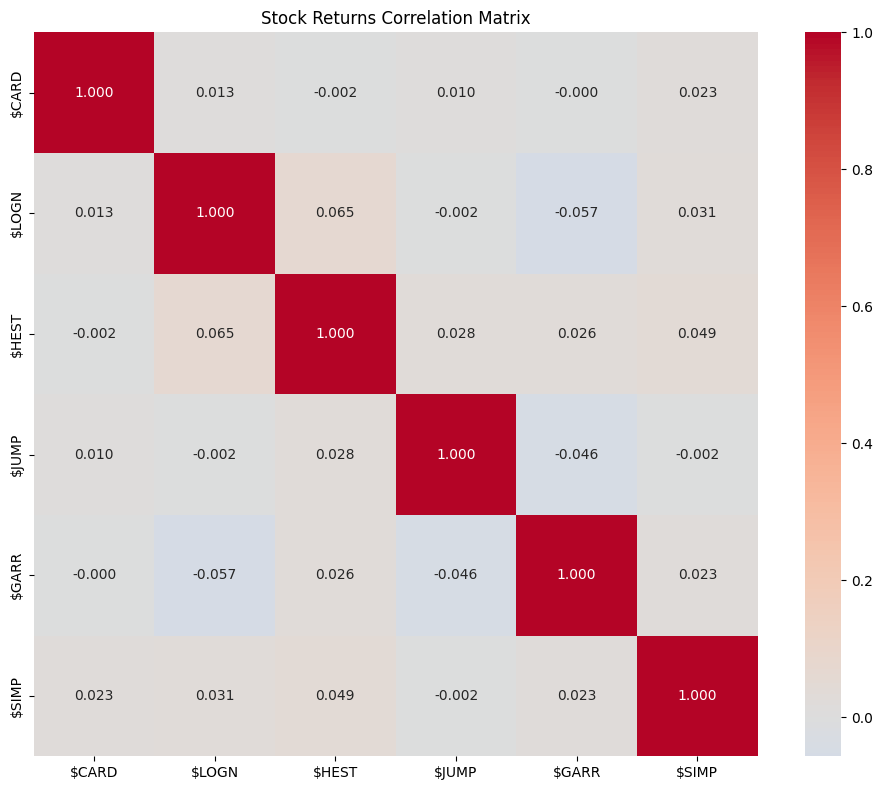

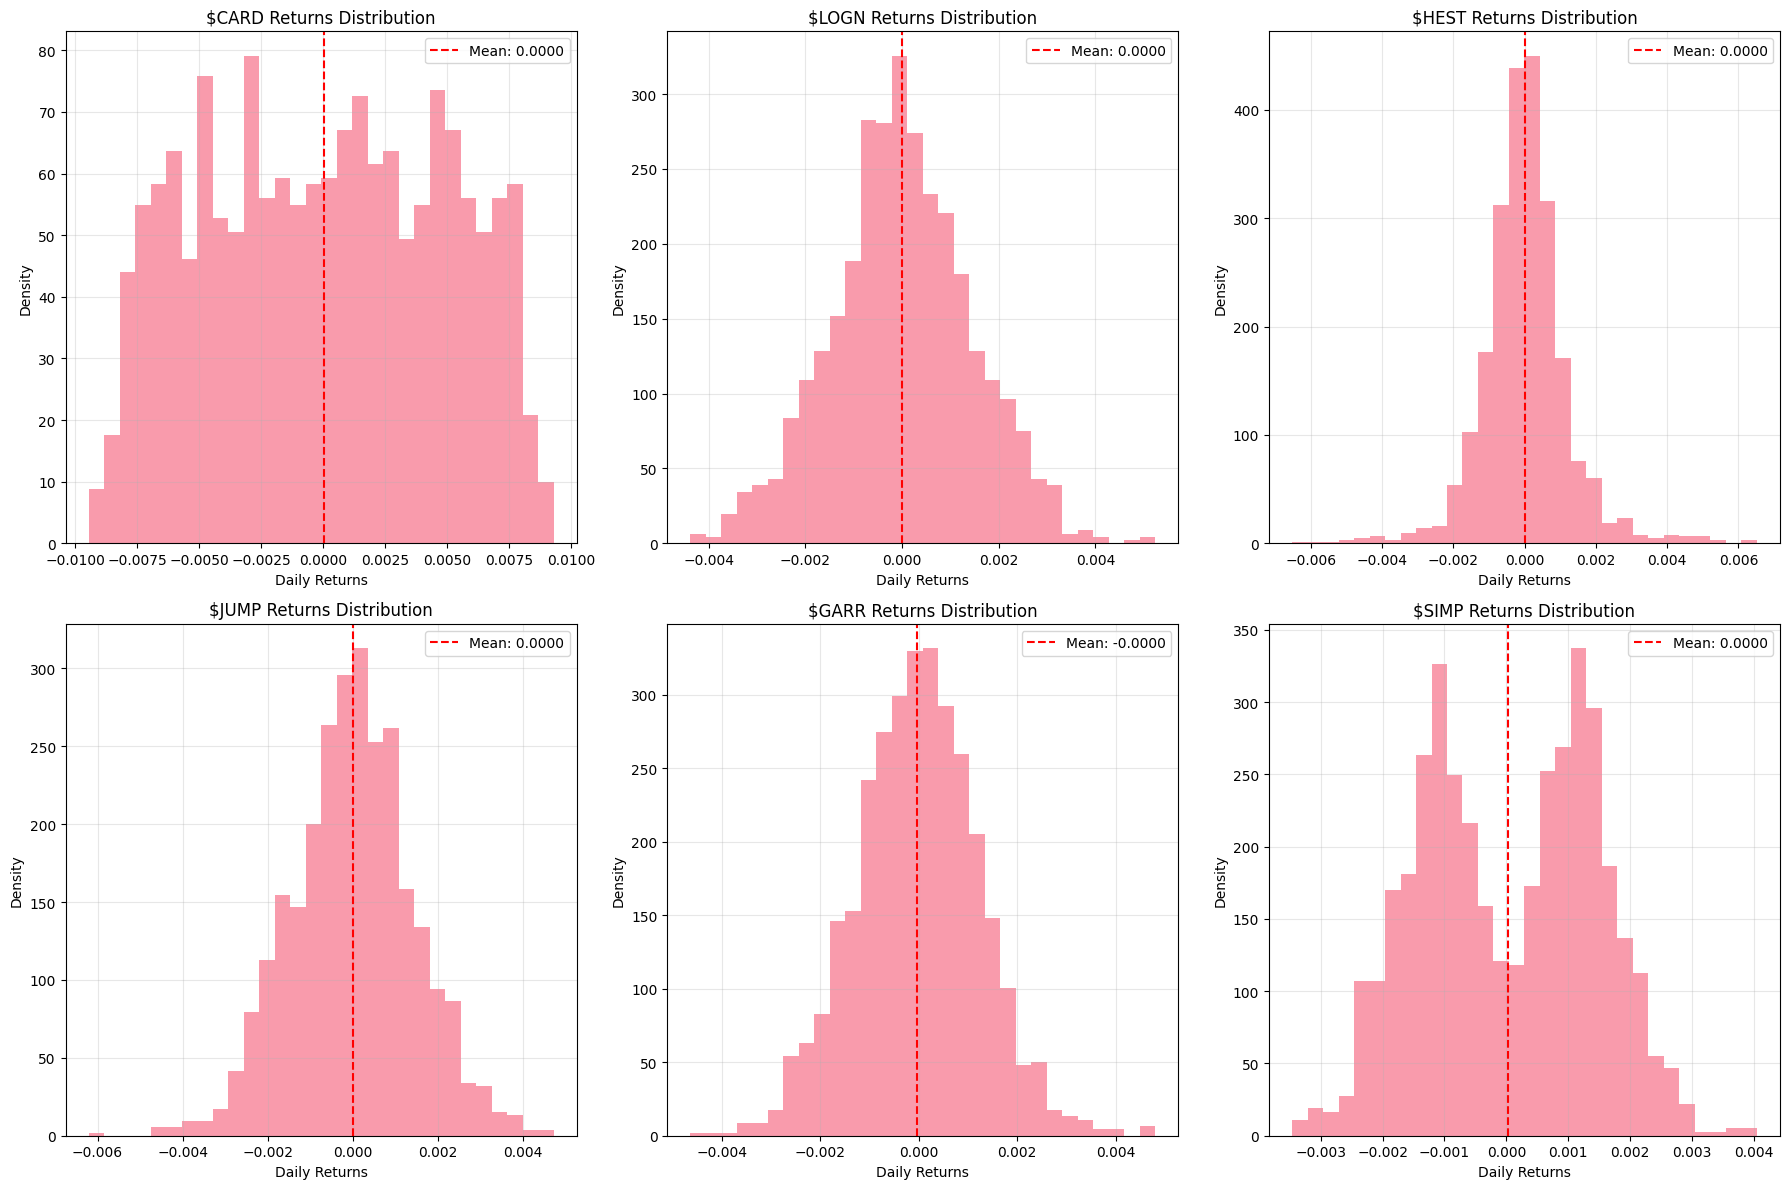

ML Features Summary:
       $CARD_price_range  $CARD_daily_return  $CARD_volatility_5d  \
count        1458.000000         1457.000000          1453.000000   
mean            0.003133            0.000019             0.004655   
std             0.001634            0.004787             0.001264   
min             0.000373           -0.009456             0.000963   
25%             0.001956           -0.004081             0.003764   
50%             0.002873            0.000097             0.004740   
75%             0.004030            0.004163             0.005544   
max             0.013868            0.009279             0.008033   

       $CARD_volatility_10d  $CARD_price_momentum  $LOGN_price_range  \
count           1448.000000           1453.000000        1458.000000   
mean               0.004783              0.000093           0.003096   
std                0.000738              0.010403           0.001565   
min                0.002242             -0.027848           0.000322 

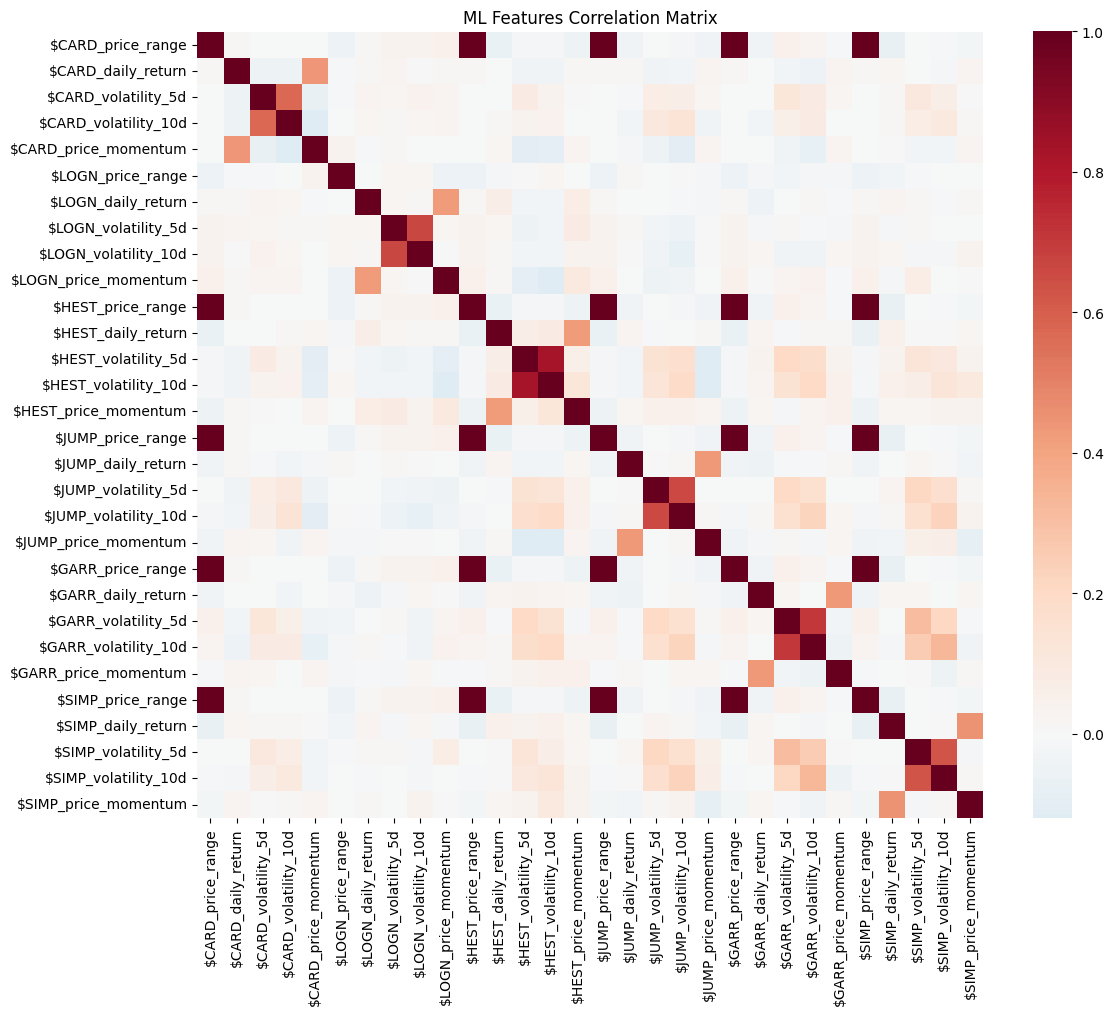


Dataset shape for ML: (1458, 30)
Features available: ['$CARD_price_range', '$CARD_daily_return', '$CARD_volatility_5d', '$CARD_volatility_10d', '$CARD_price_momentum', '$LOGN_price_range', '$LOGN_daily_return', '$LOGN_volatility_5d', '$LOGN_volatility_10d', '$LOGN_price_momentum', '$HEST_price_range', '$HEST_daily_return', '$HEST_volatility_5d', '$HEST_volatility_10d', '$HEST_price_momentum', '$JUMP_price_range', '$JUMP_daily_return', '$JUMP_volatility_5d', '$JUMP_volatility_10d', '$JUMP_price_momentum', '$GARR_price_range', '$GARR_daily_return', '$GARR_volatility_5d', '$GARR_volatility_10d', '$GARR_price_momentum', '$SIMP_price_range', '$SIMP_daily_return', '$SIMP_volatility_5d', '$SIMP_volatility_10d', '$SIMP_price_momentum']


In [32]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. Plot price trends for all stocks
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, stock in enumerate(stocks):
    close_col = f'{stock} close'
    df_plot = df[df[close_col] > 0].copy()
    df_plot[close_col] = pd.to_numeric(df_plot[close_col], errors='coerce')
    
    axes[i].plot(df_plot.index, df_plot[close_col], linewidth=2)
    axes[i].set_title(f'{stock} Close Price Trend')
    axes[i].set_xlabel('Time Period')
    axes[i].set_ylabel('Price')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Volatility comparison
vol_df = pd.DataFrame({
    'Stock': stocks,
    'Simple_Volatility': [average_volatility[stock] for stock in stocks],
    'Realized_Volatility': [realized_vol[stock] for stock in stocks]
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Simple volatility
ax1.bar(vol_df['Stock'], vol_df['Simple_Volatility'], color='skyblue', alpha=0.7)
ax1.set_title('Simple Volatility by Stock')
ax1.set_ylabel('Volatility')
ax1.tick_params(axis='x', rotation=45)

# Realized volatility
ax2.bar(vol_df['Stock'], vol_df['Realized_Volatility'], color='lightcoral', alpha=0.7)
ax2.set_title('Realized Volatility by Stock')
ax2.set_ylabel('Volatility')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Correlation matrix of returns
returns_df = pd.DataFrame(returns).dropna()
correlation_matrix = returns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Stock Returns Correlation Matrix')
plt.tight_layout()
plt.show()

# 4. Distribution of returns for each stock
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, stock in enumerate(stocks):
    returns_clean = returns[stock].dropna()
    axes[i].hist(returns_clean, bins=30, alpha=0.7, density=True)
    axes[i].axvline(returns_clean.mean(), color='red', linestyle='--', 
                   label=f'Mean: {returns_clean.mean():.4f}')
    axes[i].set_title(f'{stock} Returns Distribution')
    axes[i].set_xlabel('Daily Returns')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Create features for ML model
ml_features = pd.DataFrame()

for stock in stocks:
    # Price features
    high_col = f'{stock} high'
    low_col = f'{stock} low'
    open_col = f'{stock} open'
    close_col = f'{stock} close'
    
    # Clean and convert to numeric
    for col in [high_col, low_col, open_col, close_col]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculate technical indicators
    ml_features[f'{stock}_price_range'] = (df[high_col] - df[low_col]) / df[open_col]
    ml_features[f'{stock}_daily_return'] = returns[stock]
    ml_features[f'{stock}_volatility_5d'] = returns[stock].rolling(5).std()
    ml_features[f'{stock}_volatility_10d'] = returns[stock].rolling(10).std()
    ml_features[f'{stock}_price_momentum'] = df[close_col].pct_change(5)

# Display feature statistics
print("ML Features Summary:")
print(ml_features.describe())

# 6. Feature correlation for ML
plt.figure(figsize=(12, 10))
feature_corr = ml_features.corr()
sns.heatmap(feature_corr, cmap='RdBu_r', center=0, square=True, fmt='.2f')
plt.title('ML Features Correlation Matrix')
plt.tight_layout()
plt.show()

print(f"\nDataset shape for ML: {ml_features.shape}")
print(f"Features available: {list(ml_features.columns)}")

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


def load_and_prepare_data():
    # Load all CSV files
    underlying = pd.read_csv("dataframe.csv")
    tradeable = pd.read_csv("tradeable_instruments.csv")
    orderbook = pd.read_csv("orderbook_data.csv")
    trades = pd.read_csv("trade_events.csv")

    return underlying, tradeable, orderbook, trades


def create_features(tradeable_df, orderbook_df, trades_df):
    # Merge datasets on timestamp and instrument
    features = tradeable_df.copy()

    # Add orderbook features (latest for each instrument/timestamp)
    orderbook_agg = (
        orderbook_df.groupby(["timestamp", "instrument_id"])
        .agg(
            {
                "spread": "first",
                "mid_price": "first",
                "bid_ask_ratio": "first",
                "depth_imbalance": "first",
            }
        )
        .reset_index()
    )

    features = features.merge(
        orderbook_agg, on=["timestamp", "instrument_id"], how="left"
    )

    # Add trade features (volume, frequency in last N seconds)
    trade_agg = (
        trades_df.groupby(["timestamp", "instrument_id"])
        .agg({"quantity": "sum", "price": ["mean", "std", "count"]})
        .reset_index()
    )

    trade_agg.columns = [
        "timestamp",
        "instrument_id",
        "trade_volume",
        "avg_trade_price",
        "price_volatility",
        "trade_count",
    ]
    features = features.merge(trade_agg, on=["timestamp", "instrument_id"], how="left")

    # Fill NaN values
    features = features.fillna(0)

    return features


def train_price_prediction_model(features_df):
    features_df = features_df.sort_values(["instrument_id", "timestamp"])
    features_df["next_close"] = features_df.groupby("instrument_id")["close"].shift(-1)
    features_df = features_df.dropna(subset=["next_close"])

    # Use only numerical features that match C++
    feature_cols = [
        "open",
        "high",
        "low",
        "volume",
        "underlying_price",
        "time_to_expiry",
        "moneyness",
        "spread",
        "mid_price",
        "bid_ask_ratio",
        "depth_imbalance",
        "trade_volume",
        "avg_trade_price",
        "price_volatility",
        "trade_count",
    ]

    # Add technical indicators to match C++ (set to 0 if not calculated)
    features_df["price_momentum_5s"] = 0
    features_df["volume_momentum_5s"] = 0
    features_df["rsi_14"] = 50
    features_df["bb_position"] = 0

    feature_cols.extend(
        ["price_momentum_5s", "volume_momentum_5s", "rsi_14", "bb_position"]
    )

    X = features_df[feature_cols]
    y = features_df["next_close"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)

    return rf


def train_direction_prediction_model(features_df):
    # Predict price direction (up/down)
    features_df = features_df.sort_values(["instrument_id", "timestamp"])
    features_df["price_change"] = (
        features_df.groupby("instrument_id")["close"].pct_change().shift(-1)
    )
    features_df["direction"] = (features_df["price_change"] > 0).astype(int)
    features_df = features_df.dropna(subset=["direction"])

    feature_cols = [
        "open",
        "high",
        "low",
        "volume",
        "underlying_price",
        "time_to_expiry",
        "moneyness",
        "spread",
        "mid_price",
        "bid_ask_ratio",
        "depth_imbalance",
        "trade_volume",
        "avg_trade_price",
        "price_volatility",
        "trade_count",
    ]

    # Encode categorical variables
    le_instrument = LabelEncoder()
    le_type = LabelEncoder()
    features_df["instrument_encoded"] = le_instrument.fit_transform(
        features_df["instrument_id"]
    )
    features_df["type_encoded"] = le_type.fit_transform(features_df["instrument_type"])

    feature_cols.extend(["instrument_encoded", "type_encoded"])

    X = features_df[feature_cols]
    y = features_df["direction"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)

    accuracy = rf.score(X_test, y_test)
    print(f"Direction Prediction Accuracy: {accuracy:.4f}")

    return rf


if __name__ == "__main__":
    # Load data
    underlying, tradeable, orderbook, trades = load_and_prepare_data()

    # Create features
    features = create_features(tradeable, orderbook, trades)

    # Train models
    price_model = train_price_prediction_model(features)
    direction_model = train_direction_prediction_model(features)

    print("Models trained successfully!")

Direction Prediction Accuracy: 0.7207
Models trained successfully!


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import struct
import matplotlib.pyplot as plt


def load_and_prepare_data():
    # Load all CSV files
    underlying = pd.read_csv("dataframe.csv")
    tradeable = pd.read_csv("tradeable_instruments.csv")  # Note: filename correction
    orderbook = pd.read_csv("orderbook_data.csv")
    trades = pd.read_csv("trade_events.csv")

    return underlying, tradeable, orderbook, trades


def create_features(tradeable_df, orderbook_df, trades_df):
    # Merge datasets on timestamp and instrument
    features = tradeable_df.copy()

    # Add orderbook features (latest for each instrument/timestamp)
    orderbook_agg = (
        orderbook_df.groupby(["timestamp", "instrument_id"])
        .agg(
            {
                "spread": "first",
                "mid_price": "first",
                "bid_ask_ratio": "first",
                "depth_imbalance": "first",
            }
        )
        .reset_index()
    )

    features = features.merge(
        orderbook_agg, on=["timestamp", "instrument_id"], how="left"
    )

    # Add trade features (aggregate by timestamp and instrument)
    if len(trades_df) > 0:
        trade_agg = (
            trades_df.groupby(["timestamp", "instrument_id"])
            .agg({"quantity": "sum", "price": ["mean", "std", "count"]})
            .reset_index()
        )

        trade_agg.columns = [
            "timestamp",
            "instrument_id",
            "trade_volume_1min",
            "avg_trade_price_1min",
            "price_volatility_1min",
            "trade_count_1min",
        ]
        features = features.merge(
            trade_agg, on=["timestamp", "instrument_id"], how="left"
        )
    else:
        # If no trades data, create empty columns
        features["trade_volume_1min"] = 0
        features["avg_trade_price_1min"] = 0
        features["price_volatility_1min"] = 0
        features["trade_count_1min"] = 0

    # Fill NaN values
    features = features.fillna(0)

    return features


def calculate_technical_indicators(features_df):
    """Calculate technical indicators to match C++ implementation"""
    features_df = features_df.sort_values(["instrument_id", "timestamp"])

    # Initialize columns
    features_df["price_momentum_5s"] = 0
    features_df["volume_momentum_5s"] = 0
    features_df["rsi_14"] = 50  # Neutral RSI
    features_df["bb_position"] = 0

    # Calculate for each instrument
    for instrument in features_df["instrument_id"].unique():
        mask = features_df["instrument_id"] == instrument
        instrument_data = features_df[mask].copy()

        if len(instrument_data) < 15:
            continue

        # Price momentum (5 periods back)
        if len(instrument_data) >= 5:
            instrument_data["price_momentum_5s"] = (
                instrument_data["close"] - instrument_data["close"].shift(5)
            ) / instrument_data["close"].shift(5)

        # Volume momentum (recent 5 vs previous 5)
        if len(instrument_data) >= 10:
            recent_vol = instrument_data["volume"].rolling(5).sum()
            old_vol = instrument_data["volume"].shift(5).rolling(5).sum()
            instrument_data["volume_momentum_5s"] = (recent_vol - old_vol) / old_vol

        # Simple RSI calculation (14 periods)
        if len(instrument_data) >= 15:
            delta = instrument_data["close"].diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
            rs = gain / loss
            instrument_data["rsi_14"] = 100 - (100 / (1 + rs))

        # Fill NaN values
        instrument_data = instrument_data.fillna(
            {
                "price_momentum_5s": 0,
                "volume_momentum_5s": 0,
                "rsi_14": 50,
                "bb_position": 0,
            }
        )

        # Update main dataframe
        features_df.loc[
            mask, ["price_momentum_5s", "volume_momentum_5s", "rsi_14", "bb_position"]
        ] = instrument_data[
            ["price_momentum_5s", "volume_momentum_5s", "rsi_14", "bb_position"]
        ].values

    return features_df


def train_price_prediction_model(features_df):
    features_df = features_df.sort_values(["instrument_id", "timestamp"])
    features_df["price_change"] = (
        features_df.groupby("instrument_id")["close"].pct_change().shift(-1)
    )
    features_df["direction"] = (features_df["price_change"] > 0).astype(int)
    features_df = features_df.dropna(subset=["direction"])

    feature_cols = [
        "open",
        "high",
        "low",
        "volume",
        "underlying_price",
        "time_to_expiry",
        "moneyness",
        "spread",
        "mid_price",
        "bid_ask_ratio",
        "depth_imbalance",
        "trade_volume",
        "avg_trade_price",
        "price_volatility",
        "trade_count",
    ]

    # Encode categorical variables
    le_instrument = LabelEncoder()
    le_type = LabelEncoder()
    features_df["instrument_encoded"] = le_instrument.fit_transform(
        features_df["instrument_id"]
    )
    features_df["type_encoded"] = le_type.fit_transform(features_df["instrument_type"])

    feature_cols.extend(["instrument_encoded", "type_encoded"])

    X = features_df[feature_cols]
    y = features_df["direction"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)

    accuracy = rf.score(X_test, y_test)
    print(f"Direction Prediction Accuracy: {accuracy:.4f}")

    return rf

    # Predict next period's close price
    features_df = features_df.sort_values(["instrument_id", "timestamp"])
    features_df["next_close"] = features_df.groupby("instrument_id")["close"].shift(-1)
    features_df = features_df.dropna(subset=["next_close"])

    # EXACT feature order matching C++ toVector() - 20 features
    feature_cols = [
        "open",  # 1
        "close",  # 2
        "high",  # 3
        "low",  # 4
        "volume",  # 5
        "underlying_price",  # 6
        "time_to_expiry",  # 7
        "moneyness",  # 8
        "spread",  # 9
        "mid_price",  # 10
        "bid_ask_ratio",  # 11
        "depth_imbalance",  # 12
        "trade_volume_1min",  # 13
        "avg_trade_price_1min",  # 14
        "price_volatility_1min",  # 15
        "trade_count_1min",  # 16
        "price_momentum_5s",  # 17
        "volume_momentum_5s",  # 18
        "rsi_14",  # 19
        "bb_position",  # 20
    ]

    print(f"Using {len(feature_cols)} features: {feature_cols}")

    # Ensure all features exist
    for col in feature_cols:
        if col not in features_df.columns:
            print(f"Warning: {col} not found, setting to 0")
            features_df[col] = 0

    X = features_df[feature_cols]
    y = features_df["next_close"]

    print(f"Dataset shape: {X.shape}")
    print(f"Feature stats:\n{X.describe()}")

    # Train model
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)

    # Feature importance
    importance_df = pd.DataFrame(
        {"feature": feature_cols, "importance": rf.feature_importances_}
    ).sort_values("importance", ascending=False)

    print("Feature Importance:")
    print(importance_df.head(10))

    score = rf.score(X_test, y_test)
    print(f"Price Model R² Score: {score:.4f}")

    return rf


def train_direction_prediction_model(features_df):
    # Predict price direction (up/down)
    features_df = features_df.sort_values(["instrument_id", "timestamp"])
    features_df["price_change"] = (
        features_df.groupby("instrument_id")["close"].pct_change().shift(-1)
    )
    features_df["direction"] = (features_df["price_change"] > 0).astype(int)
    features_df = features_df.dropna(subset=["direction"])

    feature_cols = [
        "open",
        "high",
        "low",
        "volume",
        "underlying_price",
        "time_to_expiry",
        "moneyness",
        "spread",
        "mid_price",
        "bid_ask_ratio",
        "depth_imbalance",
        "trade_volume",
        "avg_trade_price",
        "price_volatility",
        "trade_count",
    ]

    # Encode categorical variables
    le_instrument = LabelEncoder()
    le_type = LabelEncoder()
    features_df["instrument_encoded"] = le_instrument.fit_transform(
        features_df["instrument_id"]
    )
    features_df["type_encoded"] = le_type.fit_transform(features_df["instrument_type"])

    feature_cols.extend(["instrument_encoded", "type_encoded"])

    X = features_df[feature_cols]
    y = features_df["direction"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)

    accuracy = rf.score(X_test, y_test)
    print(f"Direction Prediction Accuracy: {accuracy:.4f}")

    return rf

    # Predict price direction (up/down)
    features_df = features_df.sort_values(["instrument_id", "timestamp"])
    features_df["price_change"] = (
        features_df.groupby("instrument_id")["close"].pct_change().shift(-1)
    )
    features_df["direction"] = (features_df["price_change"] > 0).astype(int)
    features_df = features_df.dropna(subset=["direction"])

    # EXACT same feature order as price model - 20 features
    feature_cols = [
        "open",
        "close",
        "high",
        "low",
        "volume",
        "underlying_price",
        "time_to_expiry",
        "moneyness",
        "spread",
        "mid_price",
        "bid_ask_ratio",
        "depth_imbalance",
        "trade_volume_1min",
        "avg_trade_price_1min",
        "price_volatility_1min",
        "trade_count_1min",
        "price_momentum_5s",
        "volume_momentum_5s",
        "rsi_14",
        "bb_position",
    ]

    # Ensure all features exist
    for col in feature_cols:
        if col not in features_df.columns:
            features_df[col] = 0

    X = features_df[feature_cols]
    y = features_df["direction"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)

    accuracy = rf.score(X_test, y_test)
    print(f"Direction Prediction Accuracy: {accuracy:.4f}")

    return rf


def export_tree_to_binary(tree, filename):
    """Export sklearn RandomForest to binary format for C++ loading"""

    with open(filename, "wb") as f:
        # Write number of trees
        n_trees = len(tree.estimators_)
        f.write(struct.pack("I", n_trees))  # uint32_t
        print(f"Exporting {n_trees} trees to {filename}")

        for tree_idx, estimator in enumerate(tree.estimators_):
            tree_structure = estimator.tree_

            # Get tree properties
            n_nodes = tree_structure.node_count
            children_left = tree_structure.children_left
            children_right = tree_structure.children_right
            feature = tree_structure.feature
            threshold = tree_structure.threshold
            value = tree_structure.value

            # Write tree size
            f.write(struct.pack("I", n_nodes))  # uint32_t

            # Write each node
            for i in range(n_nodes):
                # Determine if this is a leaf node
                is_leaf = children_left[i] == children_right[i]

                # For leaf nodes, use the regression value or class probability
                if is_leaf:
                    if hasattr(tree, "classes_"):  # Classifier
                        # For binary classification, use probability of positive class
                        if value[i][0].shape[0] > 1:
                            leaf_value = value[i][0][1]  # Probability of class 1
                        else:
                            leaf_value = value[i][0][0]
                    else:  # Regressor
                        leaf_value = value[i][0][0]
                else:
                    leaf_value = 0.0  # Not used for internal nodes

                # Write node data matching C++ DecisionNode structure
                f.write(
                    struct.pack("i", feature[i] if not is_leaf else -1)
                )  # feature_idx (int)
                f.write(struct.pack("d", threshold[i]))  # threshold (double)
                f.write(struct.pack("d", leaf_value))  # value (double)
                f.write(
                    struct.pack("i", children_left[i] if not is_leaf else -1)
                )  # left_child (int)
                f.write(
                    struct.pack("i", children_right[i] if not is_leaf else -1)
                )  # right_child (int)
                f.write(struct.pack("?", is_leaf))  # is_leaf (bool)

    print(f"Successfully exported {filename}")


if __name__ == "__main__":
    # Load data
    print("Loading data...")
    underlying, tradeable, orderbook, trades = load_and_prepare_data()

    print(f"Loaded {len(tradeable)} tradeable records")
    print(f"Loaded {len(orderbook)} orderbook records")
    print(f"Loaded {len(trades)} trade records")

    # Create features
    print("Creating features...")
    features = create_features(tradeable, orderbook, trades)

    # Calculate technical indicators
    print("Calculating technical indicators...")
    features = calculate_technical_indicators(features)

    print(f"Final feature set shape: {features.shape}")
    print(f"Columns: {list(features.columns)}")

    if len(features) == 0:
        print("ERROR: No data to train on!")
        exit(1)

    # Train models
    print("Training price prediction model...")
    price_model = train_price_prediction_model(features)

    print("Training direction prediction model...")
    direction_model = train_direction_prediction_model(features)

    # Export models to binary format
    print("Exporting models...")
    export_tree_to_binary(price_model, "price_model.bin")
    export_tree_to_binary(direction_model, "direction_model.bin")

    print("Models trained and exported successfully!")
    print("Files created:")
    print("- price_model.bin")
    print("- direction_model.bin")

    # Test with dummy data matching C++ test
    print("\nTesting models with dummy data...")
    test_features = np.ones((1, 20))  # 20 features with value 1.0

    price_pred = price_model.predict(test_features)[0]
    direction_pred = direction_model.predict_proba(test_features)[0][
        1
    ]  # Probability of class 1

    print(
        f"Dummy test - Price prediction: {price_pred}, Direction prediction: {direction_pred}"
    )

Loading data...
Loaded 50094 tradeable records
Loaded 2099102 orderbook records
Loaded 132620 trade records
Creating features...
Calculating technical indicators...


/var/folders/v4/5b1zqw4n33l_nl33tp37pynw0000gn/T/ipykernel_32411/319760131.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.          0.          0.          0.          0.                 inf
  0.15156018  0.09957326  0.13884786  0.05898491  0.01310616 -0.00645161
  0.00129366  0.00389105  0.04274611 -0.00129366  0.0038961  -0.05813953
 -0.10335917 -1.         -0.00259067 -0.00258732 -1.         -1.
         inf -0.0012987  -0.00389105  0.                 inf  0.00391134
 -1.         -1.                 inf  0.00520156 -0.0012987          inf
         inf  0.02384106 -0.00388098 -0.01690507 -0.01945525  0.0309973
 -0.1992238  -0.1974026   0.00793651  0.00529101 -0.06013072 -0.29725363
 -0.2605178  -1.         -0.50263158  0.05980529 -0.36321839 -0.39824945
         inf  0.02116402 -0.76509186 -1.         -1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dty

Final feature set shape: (50094, 27)
Columns: ['timestamp', 'instrument_id', 'instrument_type', 'underlying', 'strike_price', 'expiry', 'open', 'close', 'high', 'low', 'volume', 'index', 'underlying_price', 'time_to_expiry', 'moneyness', 'spread', 'mid_price', 'bid_ask_ratio', 'depth_imbalance', 'trade_volume_1min', 'avg_trade_price_1min', 'price_volatility_1min', 'trade_count_1min', 'price_momentum_5s', 'volume_momentum_5s', 'rsi_14', 'bb_position']
Training price prediction model...


KeyError: "['trade_volume', 'avg_trade_price', 'price_volatility', 'trade_count'] not in index"

In [3]:
from pickle import dump

with open("direction_model.bin", "wb") as f:
    dump(direction_model, f, protocol=5)
with open("price_model.bin", "wb") as f:
    dump(price_model, f, protocol=5)





In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def load_and_prepare_data():
    """Load all CSV files - using your working version"""
    try:
        underlying = pd.read_csv('dataframe.csv')
        tradeable = pd.read_csv('tradeable_instruments.csv')
        orderbook = pd.read_csv('orderbook_data.csv') 
        trades = pd.read_csv('trade_events.csv')
        return underlying, tradeable, orderbook, trades
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        print("Using only underlying data...")
        underlying = pd.read_csv('dataframe.csv')
        return underlying, None, None, None

def create_features(tradeable_df, orderbook_df, trades_df):
    """Enhanced feature creation with proper validation"""
    if tradeable_df is None:
        raise ValueError("No tradeable data available")
    
    features = tradeable_df.copy()
    print(f"Starting with {len(features)} base features")
    
    # Add orderbook features if available
    if orderbook_df is not None:
        print("Adding orderbook features...")
        orderbook_agg = orderbook_df.groupby(['timestamp', 'instrument_id']).agg({
            'spread': 'first',
            'mid_price': 'first', 
            'bid_ask_ratio': 'first',
            'depth_imbalance': 'first'
        }).reset_index()
        features = features.merge(orderbook_agg, on=['timestamp', 'instrument_id'], how='left')
        print(f"After orderbook merge: {len(features)} rows")
    
    # Add trade features if available
    if trades_df is not None:
        print("Adding trade features...")
        trade_agg = trades_df.groupby(['timestamp', 'instrument_id']).agg({
            'quantity': 'sum',
            'price': ['mean', 'std', 'count']
        }).reset_index()
        trade_agg.columns = ['timestamp', 'instrument_id', 'trade_volume', 'avg_trade_price', 'price_volatility', 'trade_count']
        features = features.merge(trade_agg, on=['timestamp', 'instrument_id'], how='left')
        print(f"After trade merge: {len(features)} rows")
    
    # Fill NaN values for numeric columns only
    numeric_cols = features.select_dtypes(include=[np.number]).columns
    features[numeric_cols] = features[numeric_cols].fillna(0)
    
    return features

def comprehensive_data_cleaning(df):
    """Comprehensive cleaning of all numeric data"""
    print("Performing comprehensive data cleaning...")
    
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        # Replace infinite values with NaN first
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)
        
        # Cap extremely large values (anything beyond reasonable financial ranges)
        df[col] = df[col].clip(-1e6, 1e6)
        
        # Fill NaN with appropriate values
        if col in ['volume', 'quantity', 'trade_count']:
            df[col] = df[col].fillna(0)  # Volume-related should be 0
        elif 'price' in col.lower() or 'close' in col.lower() or 'open' in col.lower():
            # For prices, use forward fill then backward fill, then 0
            df[col] = df[col].fillna(method='ffill').fillna(method='bfill').fillna(0)
        elif 'return' in col.lower() or 'change' in col.lower():
            df[col] = df[col].fillna(0)  # Returns should be 0
        elif 'ratio' in col.lower():
            df[col] = df[col].fillna(1)  # Ratios should be 1 (neutral)
        else:
            df[col] = df[col].fillna(0)  # Default to 0
    
    print(f"Cleaned {len(numeric_cols)} numeric columns")
    return df

def add_technical_indicators(df):
    """Add technical indicators with extra safety"""
    df = df.sort_values(['instrument_id', 'timestamp'])
    
    for instrument in df['instrument_id'].unique():
        mask = df['instrument_id'] == instrument
        instrument_data = df[mask].copy()
        
        if len(instrument_data) < 20:
            continue
        
        # Simple moving averages (safe)
        instrument_data['sma_5'] = instrument_data['close'].rolling(5, min_periods=1).mean()
        instrument_data['sma_10'] = instrument_data['close'].rolling(10, min_periods=1).mean()
        instrument_data['sma_20'] = instrument_data['close'].rolling(20, min_periods=1).mean()
        
        # Exponential moving averages
        instrument_data['ema_5'] = instrument_data['close'].ewm(span=5).mean()
        instrument_data['ema_10'] = instrument_data['close'].ewm(span=10).mean()
        
        # Volatility (standard deviation)
        instrument_data['volatility_5'] = instrument_data['close'].rolling(5, min_periods=1).std().fillna(0)
        instrument_data['volatility_10'] = instrument_data['close'].rolling(10, min_periods=1).std().fillna(0)
        
        # Safe returns calculation
        close_prices = instrument_data['close'].values
        returns_1 = np.zeros_like(close_prices)
        for i in range(1, len(close_prices)):
            if close_prices[i-1] != 0 and not np.isnan(close_prices[i-1]):
                ret = (close_prices[i] - close_prices[i-1]) / close_prices[i-1]
                if np.isfinite(ret) and abs(ret) < 10:  # Cap at 1000% return
                    returns_1[i] = ret
        
        instrument_data['returns_1'] = returns_1
        
        # Safe RSI calculation
        delta = instrument_data['close'].diff()
        gain = delta.where(delta > 0, 0).rolling(14, min_periods=1).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(14, min_periods=1).mean()
        
        # Avoid division by zero in RSI
        rsi = np.full(len(instrument_data), 50.0)  # Default RSI to 50
        for i in range(len(gain)):
            if loss.iloc[i] > 1e-8:  # Avoid division by very small numbers
                rs = gain.iloc[i] / loss.iloc[i]
                if np.isfinite(rs):
                    rsi_val = 100 - (100 / (1 + rs))
                    if np.isfinite(rsi_val):
                        rsi[i] = rsi_val
        
        instrument_data['rsi'] = rsi
        
        # Safe Bollinger Bands
        instrument_data['bb_upper'] = instrument_data['sma_20'] + (2 * instrument_data['volatility_10'])
        instrument_data['bb_lower'] = instrument_data['sma_20'] - (2 * instrument_data['volatility_10'])
        
        # Safe BB position
        bb_position = np.full(len(instrument_data), 0.5)  # Default to middle
        for i in range(len(instrument_data)):
            bb_range = instrument_data['bb_upper'].iloc[i] - instrument_data['bb_lower'].iloc[i]
            if bb_range > 1e-8:  # Avoid division by zero
                pos = (instrument_data['close'].iloc[i] - instrument_data['bb_lower'].iloc[i]) / bb_range
                if np.isfinite(pos):
                    bb_position[i] = np.clip(pos, 0, 1)
        
        instrument_data['bb_position'] = bb_position
        
        # Safe volume indicators
        if 'volume' in instrument_data.columns:
            instrument_data['volume_sma'] = instrument_data['volume'].rolling(10, min_periods=1).mean()
            
            volume_ratio = np.ones(len(instrument_data))  # Default ratio to 1
            for i in range(len(instrument_data)):
                if instrument_data['volume_sma'].iloc[i] > 1e-8:
                    ratio = instrument_data['volume'].iloc[i] / instrument_data['volume_sma'].iloc[i]
                    if np.isfinite(ratio) and ratio < 1000:  # Cap extreme ratios
                        volume_ratio[i] = ratio
            
            instrument_data['volume_ratio'] = volume_ratio
        
        # Price position within daily range
        price_position = np.full(len(instrument_data), 0.5)  # Default to middle
        for i in range(len(instrument_data)):
            price_range = instrument_data['high'].iloc[i] - instrument_data['low'].iloc[i]
            if price_range > 1e-8:
                pos = (instrument_data['close'].iloc[i] - instrument_data['low'].iloc[i]) / price_range
                if np.isfinite(pos):
                    price_position[i] = np.clip(pos, 0, 1)
        
        instrument_data['price_position'] = price_position
        
        # Lag features
        for lag in [1, 2, 3, 5]:
            instrument_data[f'close_lag_{lag}'] = instrument_data['close'].shift(lag)
            instrument_data[f'returns_lag_{lag}'] = instrument_data['returns_1'].shift(lag)
            if 'volume' in instrument_data.columns:
                instrument_data[f'volume_lag_{lag}'] = instrument_data['volume'].shift(lag)
        
        # Final cleaning of all new columns
        new_cols = [col for col in instrument_data.columns if col not in df.columns]
        for col in new_cols:
            # Replace any remaining inf/nan values
            instrument_data[col] = instrument_data[col].replace([np.inf, -np.inf], 0).fillna(0)
            # Cap extreme values
            instrument_data[col] = instrument_data[col].clip(-1000, 1000)
        
        # Update main dataframe
        df.loc[mask, instrument_data.columns] = instrument_data
    
    return df

def create_proper_targets(df, horizon=1):
    """Create target variables safely"""
    df = df.sort_values(['instrument_id', 'timestamp'])
    
    # Future price
    df['target_price'] = df.groupby('instrument_id')['close'].shift(-horizon)
    
    # Safe future return calculation
    target_return = np.zeros(len(df))
    for i in range(len(df)):
        if (not pd.isna(df['target_price'].iloc[i]) and 
            not pd.isna(df['close'].iloc[i]) and 
            df['close'].iloc[i] != 0):
            ret = (df['target_price'].iloc[i] - df['close'].iloc[i]) / df['close'].iloc[i]
            if np.isfinite(ret) and abs(ret) < 10:  # Cap at 1000% return
                target_return[i] = ret
    
    df['target_return'] = target_return
    df['target_direction'] = (df['target_return'] > 0).astype(int)
    
    # Remove last rows per instrument
    df = df.groupby('instrument_id').apply(lambda x: x.iloc[:-horizon]).reset_index(drop=True)
    
    return df

def validate_and_clean_features(X):
    """Comprehensive validation and cleaning of feature matrix"""
    print("Validating and cleaning features...")
    
    # Check for infinities
    inf_mask = np.isinf(X)
    if inf_mask.any().any():
        inf_count = inf_mask.sum().sum()
        print(f"Found {inf_count} infinity values, replacing with 0")
        X = X.replace([np.inf, -np.inf], 0)
    
    # Check for very large values
    large_mask = np.abs(X) > 1e6
    if large_mask.any().any():
        large_count = large_mask.sum().sum()
        print(f"Found {large_count} very large values, capping at ±1e6")
        X = X.clip(-1e6, 1e6)
    
    # Check for NaN values
    nan_mask = X.isna()
    if nan_mask.any().any():
        nan_count = nan_mask.sum().sum()
        print(f"Found {nan_count} NaN values, replacing with 0")
        X = X.fillna(0)
    
    # Final validation
    print(f"Feature matrix stats:")
    print(f"Shape: {X.shape}")
    print(f"Min value: {X.min().min()}")
    print(f"Max value: {X.max().max()}")
    print(f"Mean absolute value: {np.abs(X).mean().mean()}")
    
    return X

class RobustTradingModel:
    def __init__(self, use_gradient_boosting=True):
        self.price_model = None
        self.direction_model = None
        self.scaler = StandardScaler()
        self.feature_cols = None
        self.label_encoders = {}
        self.use_gradient_boosting = use_gradient_boosting
        
    def prepare_features_for_training(self, df):
        """Prepare features with proper encoding"""
        df = df.copy()
        
        print("Analyzing data types...")
        
        # Identify categorical columns that need encoding
        categorical_cols = []
        for col in df.columns:
            if df[col].dtype == 'object' or df[col].dtype.name == 'category':
                categorical_cols.append(col)
        
        print(f"Found categorical columns: {categorical_cols}")
        
        # Encode categorical variables
        for col in categorical_cols:
            if col not in ['target_price', 'target_return', 'target_direction']:  # Don't encode targets
                print(f"Encoding {col}...")
                try:
                    le = LabelEncoder()
                    # Handle NaN values by converting to string first
                    df[col] = df[col].astype(str)
                    df[f'{col}_encoded'] = le.fit_transform(df[col])
                    self.label_encoders[col] = le
                    print(f"Successfully encoded {col}")
                except Exception as e:
                    print(f"Error encoding {col}: {e}")
        
        # Define feature columns (exclude targets, identifiers, and original categorical columns)
        exclude_cols = ['timestamp', 'target_price', 'target_return', 'target_direction'] + categorical_cols
        
        # Only use numeric columns and encoded categorical columns
        potential_features = []
        for col in df.columns:
            if col not in exclude_cols:
                # Check if column is numeric
                if pd.api.types.is_numeric_dtype(df[col]):
                    # Check if column has any non-null values
                    if not df[col].isna().all():
                        potential_features.append(col)
        
        self.feature_cols = potential_features
        
        print(f"Selected {len(self.feature_cols)} features")
        print("Features:", self.feature_cols[:10], "..." if len(self.feature_cols) > 10 else "")
        
        return df
    
    def train_models(self, df):
        """Train models with proper time series validation"""
        print("Preparing features for training...")
        df = self.prepare_features_for_training(df)
        
        # Remove rows with missing targets
        initial_size = len(df)
        df_clean = df.dropna(subset=['target_price', 'target_direction'])
        print(f"Removed {initial_size - len(df_clean)} rows with missing targets")
        
        if len(df_clean) < 100:
            raise ValueError(f"Insufficient data for training: only {len(df_clean)} samples")
        
        # Get features and targets
        X = df_clean[self.feature_cols].copy()
        
        # Ensure all features are numeric and handle any remaining issues
        for col in self.feature_cols:
            if not pd.api.types.is_numeric_dtype(X[col]):
                print(f"Converting {col} to numeric...")
                X[col] = pd.to_numeric(X[col], errors='coerce')
        
        # Comprehensive cleaning and validation
        X = validate_and_clean_features(X)
        
        y_price = df_clean['target_price']
        y_direction = df_clean['target_direction']
        
        print(f"Training dataset: {X.shape[0]} samples, {X.shape[1]} features")
        
        # Convert to numpy arrays with float64 for better precision
        X_values = X.values.astype(np.float64)
        y_price_values = y_price.values.astype(np.float64)
        y_direction_values = y_direction.values.astype(int)
        
        # Final safety check
        if np.any(np.isinf(X_values)) or np.any(np.isnan(X_values)):
            print("Final cleaning of X_values...")
            X_values = np.nan_to_num(X_values, nan=0.0, posinf=1e6, neginf=-1e6)
        
        # Scale features
        try:
            X_scaled = self.scaler.fit_transform(X_values)
            print("Features scaled successfully")
        except Exception as e:
            print(f"Error during scaling: {e}")
            print("Applying conservative clipping...")
            X_values = np.clip(X_values, -1e3, 1e3)
            X_scaled = self.scaler.fit_transform(X_values)
            print("Features scaled successfully after clipping")
        
        # Time series split for proper validation
        tscv = TimeSeriesSplit(n_splits=3)
        
        # Initialize models with conservative parameters
        if self.use_gradient_boosting:
            self.price_model = GradientBoostingRegressor(
                n_estimators=50,
                max_depth=4,
                learning_rate=0.1,
                subsample=0.8,
                random_state=42
            )
        else:
            self.price_model = RandomForestRegressor(
                n_estimators=50,
                max_depth=8,
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=42
            )
        
        self.direction_model = RandomForestClassifier(
            n_estimators=50,
            max_depth=8,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42
        )
        
        # Cross-validation
        print("Performing time series cross-validation...")
        price_scores = []
        direction_scores = []
        
        for fold, (train_idx, test_idx) in enumerate(tscv.split(X_scaled)):
            print(f"Fold {fold + 1}/3...")
            
            X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
            y_price_train, y_price_test = y_price_values[train_idx], y_price_values[test_idx]
            y_dir_train, y_dir_test = y_direction_values[train_idx], y_direction_values[test_idx]
            
            # Train and evaluate price model
            price_model_fold = self.price_model.__class__(**self.price_model.get_params())
            price_model_fold.fit(X_train, y_price_train)
            price_pred = price_model_fold.predict(X_test)
            price_scores.append(r2_score(y_price_test, price_pred))
            
            # Train and evaluate direction model
            direction_model_fold = self.direction_model.__class__(**self.direction_model.get_params())
            direction_model_fold.fit(X_train, y_dir_train)
            dir_pred = direction_model_fold.predict(X_test)
            direction_scores.append(np.mean(y_dir_test == dir_pred))
        
        # Final training on all data
        print("Training final models on all data...")
        self.price_model.fit(X_scaled, y_price_values)
        self.direction_model.fit(X_scaled, y_direction_values)
        
        # Print results
        print(f"\n{'='*50}")
        print("CROSS-VALIDATION RESULTS:")
        print(f"Price Model R² Score: {np.mean(price_scores):.4f} ± {np.std(price_scores):.4f}")
        print(f"Direction Model Accuracy: {np.mean(direction_scores):.4f} ± {np.std(direction_scores):.4f}")
        print(f"{'='*50}")
        
        # Feature importance
        if hasattr(self.price_model, 'feature_importances_'):
            importance_df = pd.DataFrame({
                'feature': self.feature_cols,
                'importance': self.price_model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("\nTop 10 Most Important Features:")
            print(importance_df.head(10).to_string(index=False))
        
        return self
    
    def predict(self, df):
        """Make predictions on new data"""
        if self.price_model is None:
            raise ValueError("Model not trained yet")
        
        # Apply same encoding as training
        for col, le in self.label_encoders.items():
            if col in df.columns:
                df[f'{col}_encoded'] = le.transform(df[col].astype(str))
        
        X = df[self.feature_cols].copy()
        
        # Apply same cleaning as training
        X = validate_and_clean_features(X)
        
        # Convert to numpy with same precision
        X_values = X.values.astype(np.float64)
        
        # Final safety check
        if np.any(np.isinf(X_values)) or np.any(np.isnan(X_values)):
            X_values = np.nan_to_num(X_values, nan=0.0, posinf=1e6, neginf=-1e6)
        
        X_scaled = self.scaler.transform(X_values)
        
        price_pred = self.price_model.predict(X_scaled)
        direction_pred = self.direction_model.predict(X_scaled)
        direction_proba = self.direction_model.predict_proba(X_scaled)[:, 1]
        
        return {
            'price_prediction': price_pred,
            'direction_prediction': direction_pred,
            'direction_probability': direction_proba
        }

def main():
    print("Loading data...")
    underlying, tradeable, orderbook, trades = load_and_prepare_data()
    
    if tradeable is None:
        print("No tradeable instruments data found. Cannot proceed.")
        return None, None
    
    print("Creating features...")
    features = create_features(tradeable, orderbook, trades)
    
    if len(features) == 0:
        print("No features created!")
        return None, None
    
    print("Adding technical indicators...")
    features = add_technical_indicators(features)
    
    print("Comprehensive data cleaning...")
    features = comprehensive_data_cleaning(features)
    
    print("Creating targets...")
    features = create_proper_targets(features)
    
    print(f"\nFinal dataset info:")
    print(f"Shape: {features.shape}")
    print(f"Instruments: {features['instrument_id'].nunique()}")
    print(f"Time range: {features['timestamp'].min()} to {features['timestamp'].max()}")
    print(f"Valid targets: {features['target_price'].notna().sum()}")
    
    print("\nTraining models...")
    model = RobustTradingModel(use_gradient_boosting=True)
    model.train_models(features)
    
    print("\nModel training completed successfully!")
    return model, features

if __name__ == "__main__":
    model, data = main()
model

Loading data...
Creating features...
Starting with 50094 base features
Adding orderbook features...
After orderbook merge: 50094 rows
Adding trade features...
After trade merge: 50094 rows
Adding technical indicators...
Comprehensive data cleaning...
Performing comprehensive data cleaning...
Cleaned 47 numeric columns
Creating targets...

Final dataset info:
Shape: (49104, 53)
Instruments: 990
Time range: 1000000 to 1000000
Valid targets: 49104

Training models...
Preparing features for training...
Analyzing data types...
Found categorical columns: ['instrument_id', 'instrument_type', 'underlying']
Encoding instrument_id...
Successfully encoded instrument_id
Encoding instrument_type...
Successfully encoded instrument_type
Encoding underlying...
Successfully encoded underlying
Selected 49 features
Features: ['strike_price', 'expiry', 'open', 'close', 'high', 'low', 'volume', 'index', 'underlying_price', 'time_to_expiry'] ...
Removed 0 rows with missing targets
Validating and cleaning fe

In [15]:
def export_tree_to_binary(tree, filename):
    """Export sklearn RandomForest to binary format for C++ loading"""

    with open(filename, "wb") as f:
        # Write number of trees
        n_trees = len(tree.estimators_)
        f.write(struct.pack("I", n_trees))  # uint32_t
        print(f"Exporting {n_trees} trees to {filename}")

        for tree_idx, estimator in enumerate(tree.estimators_):
            tree_structure = estimator.tree_

            # Get tree properties
            n_nodes = tree_structure.node_count
            children_left = tree_structure.children_left
            children_right = tree_structure.children_right
            feature = tree_structure.feature
            threshold = tree_structure.threshold
            value = tree_structure.value

            # Write tree size
            f.write(struct.pack("I", n_nodes))  # uint32_t

            # Write each node
            for i in range(n_nodes):
                # Determine if this is a leaf node
                is_leaf = children_left[i] == children_right[i]

                # For leaf nodes, use the regression value or class probability
                if is_leaf:
                    if hasattr(tree, "classes_"):  # Classifier
                        # For binary classification, use probability of positive class
                        if value[i][0].shape[0] > 1:
                            leaf_value = value[i][0][1]  # Probability of class 1
                        else:
                            leaf_value = value[i][0][0]
                    else:  # Regressor
                        leaf_value = value[i][0][0]
                else:
                    leaf_value = 0.0  # Not used for internal nodes

                # Write node data matching C++ DecisionNode structure
                f.write(
                    struct.pack("i", feature[i] if not is_leaf else -1)
                )  # feature_idx (int)
                f.write(struct.pack("d", threshold[i]))  # threshold (double)
                f.write(struct.pack("d", leaf_value))  # value (double)
                f.write(
                    struct.pack("i", children_left[i] if not is_leaf else -1)
                )  # left_child (int)
                f.write(
                    struct.pack("i", children_right[i] if not is_leaf else -1)
                )  # right_child (int)
                f.write(struct.pack("?", is_leaf))  # is_leaf (bool)

    print(f"Successfully exported {filename}")
import struct

# Export the price prediction model
export_tree_to_binary(model.price_model, 'price_model.bin')

# Export the direction prediction model  
export_tree_to_binary(model.direction_model, 'direction_model.bin')

print("Both models exported successfully!")

Exporting 50 trees to price_model.bin


AttributeError: 'numpy.ndarray' object has no attribute 'tree_'

In [ ]:
from pickle import dump

with open("gigamodel.pkl", "wb") as f:
    dump(model, f, protocol=5)

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import struct
import os

def clean_data(df):
    """Clean data by handling inf, nan, and extreme values"""
    print("Cleaning data...")
    
    # Replace inf with nan first
    df = df.replace([np.inf, -np.inf], np.nan)
    
    # Get numeric columns only
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    print(f"Cleaning {len(numeric_columns)} numeric columns")
    
    for col in numeric_columns:
        # Check for issues
        inf_count = np.isinf(df[col]).sum()
        nan_count = df[col].isna().sum()
        
        if inf_count > 0 or nan_count > 0:
            print(f"  {col}: {nan_count} NaN, {inf_count} Inf values")
        
        # Replace inf and nan with appropriate values
        if df[col].dtype in ['float64', 'float32', 'int64', 'int32']:
            # For price-like columns, use median
            if any(keyword in col.lower() for keyword in ['price', 'open', 'close', 'high', 'low', 'mid']):
                fill_value = df[col].median()
                if pd.isna(fill_value) or np.isinf(fill_value):
                    fill_value = 100.0  # Default reasonable price
            # For volume-like columns, use median or 0
            elif any(keyword in col.lower() for keyword in ['volume', 'quantity', 'count']):
                fill_value = df[col].median()
                if pd.isna(fill_value) or np.isinf(fill_value):
                    fill_value = 0.0
            # For ratio/percentage columns, use 0 or 1
            elif any(keyword in col.lower() for keyword in ['ratio', 'momentum', 'imbalance', 'moneyness']):
                if 'ratio' in col.lower() or 'moneyness' in col.lower():
                    fill_value = 1.0
                else:
                    fill_value = 0.0
            # For time columns
            elif 'time' in col.lower() or 'expiry' in col.lower():
                fill_value = df[col].median()
                if pd.isna(fill_value) or np.isinf(fill_value):
                    fill_value = 0.0
            else:
                fill_value = 0.0
                
            df[col] = df[col].fillna(fill_value)
            
            # Cap extreme values (beyond 6 standard deviations)
            if col not in ['timestamp', 'expiry']:  # Don't cap timestamp columns
                std_val = df[col].std()
                mean_val = df[col].mean()
                
                if not pd.isna(std_val) and std_val > 0:
                    upper_bound = mean_val + 6 * std_val
                    lower_bound = mean_val - 6 * std_val
                    
                    # Special handling for strictly positive values
                    if col in ['volume', 'quantity', 'time_to_expiry'] and lower_bound < 0:
                        lower_bound = 0
                    
                    original_outliers = ((df[col] > upper_bound) | (df[col] < lower_bound)).sum()
                    if original_outliers > 0:
                        print(f"  {col}: Capping {original_outliers} extreme values")
                        df[col] = np.clip(df[col], lower_bound, upper_bound)
    
    return df

def create_better_targets(features_df):
    """Create better calibrated targets for training"""
    features_df = features_df.sort_values(['instrument_id', 'timestamp'])
    
    # Create multiple future price targets for better prediction
    for horizon in [1, 3, 5]:  # 1, 3, 5 periods ahead
        features_df[f'next_close_{horizon}'] = features_df.groupby('instrument_id')['close'].shift(-horizon)
        
        # Calculate price change percentage
        price_change = (features_df[f'next_close_{horizon}'] - features_df['close']) / features_df['close']
        features_df[f'price_change_{horizon}'] = np.clip(price_change, -0.5, 0.5)  # Cap at ±50%
        
        # Create direction targets with different thresholds
        # More balanced: use smaller threshold for more 50/50 split
        threshold = 0.0005  # 0.05% threshold - very small for more balanced classes
        features_df[f'direction_{horizon}'] = (features_df[f'price_change_{horizon}'] > threshold).astype(int)
    
    # Use shortest horizon for main targets
    features_df['next_close'] = features_df['next_close_1']
    features_df['price_change'] = features_df['price_change_1']
    features_df['direction'] = features_df['direction_1']
    
    # Check class balance
    direction_counts = features_df['direction'].value_counts()
    print(f"Direction class balance: {direction_counts}")
    print(f"Direction proportions: {direction_counts / len(features_df)}")
    
    return features_df

def create_synthetic_data():
    """Create well-balanced synthetic data"""
    print("Creating synthetic data...")
    
    n_samples = 5000
    instruments = ['$CARD_call_98000_990', '$CARD_put_99000_990', '$LOGN_call_97000_1005',
                  '$HEST_put_102000_1020', '$JUMP_call_96000_1005', '$GARR_future_1020']
    
    tradeable_data = []
    base_timestamp = 1734249600000
    
    for i in range(n_samples):
        timestamp = base_timestamp + i * 1000
        instrument = np.random.choice(instruments)
        
        # Parse instrument
        parts = instrument.split('_')
        underlying = parts[0]
        instrument_type = parts[1] if len(parts) > 1 else 'spot'
        strike_price = int(parts[2]) if len(parts) > 2 and parts[2].isdigit() else 0
        expiry = int(parts[3]) if len(parts) > 3 and parts[3].isdigit() else timestamp + 86400000
        
        # Generate realistic trending data (not just random)
        base_price = 100 + 10 * np.sin(i / 100)  # Some trend
        noise = np.random.normal(0, 2)  # Small noise
        
        # Create slight positive bias in price movement for better direction balance
        price_drift = 0.1 if i % 2 == 0 else -0.05  # Slight upward bias
        
        current_price = max(0.01, base_price + noise + price_drift)
        
        tradeable_data.append({
            'timestamp': timestamp,
            'instrument_id': instrument,
            'instrument_type': instrument_type,
            'underlying': underlying,
            'strike_price': max(0, strike_price),
            'expiry': expiry,
            'open': max(0.01, current_price * np.random.uniform(0.999, 1.001)),
            'close': current_price,
            'high': max(current_price, current_price * np.random.uniform(1.0, 1.02)),
            'low': min(current_price, current_price * np.random.uniform(0.98, 1.0)),
            'volume': max(0, np.random.uniform(0, 5000)),
            'index': np.random.uniform(0.9, 1.1),
            'underlying_price': max(0.01, base_price),
            'time_to_expiry': max(0, expiry - timestamp),
            'moneyness': max(0.1, min(5.0, strike_price / base_price if strike_price > 0 else 1.0))
        })
    
    tradeable = pd.DataFrame(tradeable_data)
    
    # Create correlated orderbook data
    orderbook = pd.DataFrame({
        'timestamp': tradeable['timestamp'],
        'instrument_id': tradeable['instrument_id'],
        'spread': np.random.uniform(0.1, 5, len(tradeable)),
        'mid_price': tradeable['close'],
        'bid_ask_ratio': np.random.uniform(0.7, 1.5, len(tradeable)),  # More realistic range
        'depth_imbalance': np.random.uniform(-0.3, 0.3, len(tradeable))  # Smaller range
    })
    
    # Create correlated trades data
    trades = pd.DataFrame({
        'timestamp': tradeable['timestamp'],
        'instrument_id': tradeable['instrument_id'],
        'price': tradeable['close'] * np.random.uniform(0.999, 1.001, len(tradeable)),
        'quantity': np.random.uniform(1, 100, len(tradeable)),
        'passive_order_id': range(len(tradeable)),
        'active_order_id': range(len(tradeable)),
        'trade_direction': np.random.choice([0, 1], len(tradeable))
    })
    
    underlying = pd.DataFrame()
    
    return underlying, tradeable, orderbook, trades

def load_and_prepare_data():
    """Load all CSV files with proper error handling"""
    try:
        # Load underlying prices
        print("Loading underlying prices...")
        underlying = pd.read_csv("dataframe.csv")
        underlying = clean_data(underlying)
        print(f"Underlying data shape: {underlying.shape}")
        
        # Load tradeable instruments 
        print("Loading tradeable instruments...")
        tradeable = pd.read_csv("tradeable_instruments.csv")
        tradeable = clean_data(tradeable)
        print(f"Tradeable data shape: {tradeable.shape}")
        
        # Load orderbook data
        print("Loading orderbook data...")
        orderbook = pd.read_csv("orderbook_data.csv")
        orderbook = clean_data(orderbook)
        print(f"Orderbook data shape: {orderbook.shape}")
        
        # Load trade events
        print("Loading trade events...")
        trades = pd.read_csv("trade_events.csv")
        trades = clean_data(trades)
        print(f"Trades data shape: {trades.shape}")
        
        return underlying, tradeable, orderbook, trades
        
    except FileNotFoundError as e:
        print(f"Error loading file: {e}")
        print("Creating synthetic data instead...")
        return create_synthetic_data()
    except Exception as e:
        print(f"Error processing data: {e}")
        return create_synthetic_data()

def create_features_from_data(tradeable_df, orderbook_df, trades_df):
    """Create ML features with proper cleaning"""
    print("Creating features from data...")
    
    features = tradeable_df.copy()
    
    # Merge with orderbook data
    if len(orderbook_df) > 0:
        orderbook_latest = orderbook_df.groupby(['timestamp', 'instrument_id']).last().reset_index()
        features = features.merge(orderbook_latest[['timestamp', 'instrument_id', 'spread', 'mid_price', 'bid_ask_ratio', 'depth_imbalance']], 
                                on=['timestamp', 'instrument_id'], how='left')
    else:
        features['spread'] = 1.0
        features['mid_price'] = features['close']
        features['bid_ask_ratio'] = 1.0
        features['depth_imbalance'] = 0.0
    
    # Aggregate trade data safely
    if len(trades_df) > 0:
        trade_agg = trades_df.groupby(['timestamp', 'instrument_id']).agg({
            'quantity': 'sum',
            'price': ['mean', 'std', 'count']
        }).reset_index()
        
        trade_agg.columns = ['timestamp', 'instrument_id', 'trade_volume_1min', 'avg_trade_price_1min', 'price_volatility_1min', 'trade_count_1min']
        features = features.merge(trade_agg, on=['timestamp', 'instrument_id'], how='left')
    else:
        features['trade_volume_1min'] = 0
        features['avg_trade_price_1min'] = features['close']
        features['price_volatility_1min'] = 0
        features['trade_count_1min'] = 0
    
    # Clean merged data
    features = clean_data(features)
    
    # Calculate technical indicators safely
    features = calculate_technical_indicators_safe(features)
    
    # Create better targets
    features = create_better_targets(features)
    
    # Final cleaning
    features = clean_data(features)
    
    print(f"Created features dataset with shape: {features.shape}")
    return features

def calculate_technical_indicators_safe(df):
    """Calculate technical indicators with safe math operations"""
    df = df.sort_values(['instrument_id', 'timestamp'])
    
    # Initialize columns
    df['price_momentum_5s'] = 0.0
    df['volume_momentum_5s'] = 0.0
    df['rsi_14'] = 50.0
    df['bb_position'] = 0.0
    
    # Calculate for each instrument
    for instrument in df['instrument_id'].unique():
        mask = df['instrument_id'] == instrument
        instrument_data = df[mask].copy()
        
        if len(instrument_data) < 5:
            continue
            
        # Safe price momentum calculation
        if len(instrument_data) >= 5:
            price_5_back = instrument_data['close'].shift(5)
            # Safe division
            momentum = np.where(price_5_back > 0, 
                              (instrument_data['close'] - price_5_back) / price_5_back, 
                              0)
            # Cap momentum to reasonable range
            momentum = np.clip(momentum, -1.0, 1.0)
            instrument_data['price_momentum_5s'] = momentum
            
        # Safe volume momentum
        if len(instrument_data) >= 10:
            recent_vol = instrument_data['volume'].rolling(5, min_periods=1).sum()
            old_vol = instrument_data['volume'].shift(5).rolling(5, min_periods=1).sum()
            # Safe division
            vol_momentum = np.where(old_vol > 0, 
                                  (recent_vol - old_vol) / old_vol, 
                                  0)
            # Cap to reasonable range
            vol_momentum = np.clip(vol_momentum, -2.0, 2.0)
            instrument_data['volume_momentum_5s'] = vol_momentum
            
        # Safe RSI calculation
        if len(instrument_data) >= 15:
            delta = instrument_data['close'].diff()
            gain = delta.where(delta > 0, 0).rolling(window=14, min_periods=1).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=14, min_periods=1).mean()
            
            # Safe RSI calculation
            rs = np.where(loss > 0, gain / loss, 1)
            rsi = 100 - (100 / (1 + rs))
            # Ensure RSI is in valid range
            rsi = np.clip(rsi, 0, 100)
            instrument_data['rsi_14'] = rsi
            
        # Fill any remaining NaN/inf
        instrument_data = instrument_data.replace([np.inf, -np.inf], 0)
        instrument_data = instrument_data.fillna(0)
        
        # Update main dataframe
        df.loc[mask, ['price_momentum_5s', 'volume_momentum_5s', 'rsi_14', 'bb_position']] = \
            instrument_data[['price_momentum_5s', 'volume_momentum_5s', 'rsi_14', 'bb_position']].values
    
    return df

def validate_features(df, feature_columns):
    """Validate that all features are finite and reasonable"""
    print("Validating features...")
    
    for col in feature_columns:
        if col not in df.columns:
            print(f"Warning: {col} missing, adding with default value")
            # Set reasonable defaults based on column name
            if any(keyword in col.lower() for keyword in ['price', 'open', 'close', 'high', 'low', 'mid']):
                df[col] = 100.0
            elif any(keyword in col.lower() for keyword in ['volume', 'quantity', 'count']):
                df[col] = 0.0
            elif 'ratio' in col.lower() or 'moneyness' in col.lower():
                df[col] = 1.0
            elif 'rsi' in col.lower():
                df[col] = 50.0
            else:
                df[col] = 0.0
    
    # Final validation
    X = df[feature_columns].values
    
    # Check for any remaining inf/nan
    inf_mask = np.isinf(X)
    nan_mask = np.isnan(X)
    
    if inf_mask.any():
        print(f"ERROR: Still have {inf_mask.sum()} infinite values")
        X[inf_mask] = 0
        
    if nan_mask.any():
        print(f"ERROR: Still have {nan_mask.sum()} NaN values")
        X[nan_mask] = 0
    
    # Check for extremely large values
    large_mask = np.abs(X) > 1e10
    if large_mask.any():
        print(f"Warning: {large_mask.sum()} extremely large values, capping...")
        X[large_mask] = np.sign(X[large_mask]) * 1e10
    
    # Update dataframe
    for i, col in enumerate(feature_columns):
        df[col] = X[:, i]
    
    print("Feature validation complete")
    return df

def prepare_features_for_ml(features_df):
    """Prepare clean features for ML"""
    
    # Remove invalid targets
    features_df = features_df.dropna(subset=['next_close', 'direction'])
    
    # Feature columns
    feature_columns = [
        'open', 'close', 'high', 'low', 'volume', 'underlying_price', 
        'time_to_expiry', 'moneyness', 'spread', 'mid_price',
        'bid_ask_ratio', 'depth_imbalance', 'trade_volume_1min', 
        'avg_trade_price_1min', 'price_volatility_1min', 'trade_count_1min',
        'price_momentum_5s', 'volume_momentum_5s', 'rsi_14', 'bb_position'
    ]
    
    # Validate and clean features
    features_df = validate_features(features_df, feature_columns)
    
    print(f"Final clean dataset shape: {features_df.shape}")
    
    return features_df, feature_columns

def export_sklearn_forest_to_binary(model, filename):
    """Export sklearn RandomForest to binary format for C++ loading"""
    
    with open(filename, 'wb') as f:
        n_trees = len(model.estimators_)
        f.write(struct.pack('I', n_trees))
        print(f"Exporting {n_trees} trees to {filename}")
        
        for tree_idx, estimator in enumerate(model.estimators_):
            tree_structure = estimator.tree_
            
            n_nodes = tree_structure.node_count
            children_left = tree_structure.children_left
            children_right = tree_structure.children_right
            feature = tree_structure.feature
            threshold = tree_structure.threshold
            value = tree_structure.value
            
            f.write(struct.pack('I', n_nodes))
            
            for i in range(n_nodes):
                is_leaf = children_left[i] == children_right[i]
                
                if is_leaf:
                    if hasattr(model, 'classes_'):
                        # For classifier: probability of positive class (class 1)
                        if len(value[i][0]) > 1:
                            leaf_value = value[i][0][1] / np.sum(value[i][0])
                        else:
                            leaf_value = value[i][0][0]
                    else:
                        # For regressor: the prediction value
                        leaf_value = value[i][0][0]
                else:
                    leaf_value = 0.0
                
                # Ensure all values are finite
                if not np.isfinite(leaf_value):
                    leaf_value = 0.0
                if not np.isfinite(threshold[i]):
                    threshold[i] = 0.0
                
                f.write(struct.pack('i', feature[i] if not is_leaf else -1))
                f.write(struct.pack('d', float(threshold[i])))
                f.write(struct.pack('d', float(leaf_value)))
                f.write(struct.pack('i', children_left[i] if not is_leaf else -1))
                f.write(struct.pack('i', children_right[i] if not is_leaf else -1))
                f.write(struct.pack('?', is_leaf))
    
    print(f"Successfully exported {filename}")

def train_models(features_df, feature_columns):
    """Train models with better calibration"""
    
    # Final validation before training
    X = features_df[feature_columns].values
    
    # Ensure X is clean
    assert np.all(np.isfinite(X)), "X contains non-finite values!"
    
    print(f"Training with {X.shape[0]} samples and {X.shape[1]} features")
    print(f"Feature ranges: min={X.min():.2f}, max={X.max():.2f}")
    
    # Train price model (regression)
    print("Training price prediction model...")
    y_price = features_df['next_close'].values
    assert np.all(np.isfinite(y_price)), "Price targets contain non-finite values!"
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=42)
    
    price_model = RandomForestRegressor(
        n_estimators=30,
        max_depth=6,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    )
    price_model.fit(X_train, y_train)
    
    price_score = price_model.score(X_test, y_test)
    print(f"Price model R² score: {price_score:.4f}")
    
    # Train direction model (classification) with calibration
    print("Training direction prediction model...")
    y_direction = features_df['direction'].values
    
    print(f"Direction target distribution: {np.bincount(y_direction)}")
    print(f"Direction target proportions: {np.bincount(y_direction) / len(y_direction)}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_direction, test_size=0.2, random_state=42)
    
    # Base classifier
    base_classifier = RandomForestClassifier(
        n_estimators=30,
        max_depth=6,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',  # Handle class imbalance
        random_state=42
    )
    
    # Calibrate probabilities for better direction prediction
    direction_model = CalibratedClassifierCV(base_classifier, method='isotonic', cv=3)
    direction_model.fit(X_train, y_train)
    
    direction_score = direction_model.score(X_test, y_test)
    print(f"Direction model accuracy: {direction_score:.4f}")
    
    # Test calibration
    test_probs = direction_model.predict_proba(X_test)[:, 1]
    print(f"Direction probabilities - min: {test_probs.min():.3f}, max: {test_probs.max():.3f}, mean: {test_probs.mean():.3f}")
    
    return price_model, direction_model

def main():
    print("Improved Trading Model Training")
    print("=" * 50)
    
    # Load and clean data
    underlying, tradeable, orderbook, trades = load_and_prepare_data()
    
    if len(tradeable) == 0:
        print("Error: No tradeable data available")
        return
    
    # Create clean features
    features = create_features_from_data(tradeable, orderbook, trades)
    features_df, feature_columns = prepare_features_for_ml(features)
    
    if len(features_df) < 100:
        print(f"Warning: Only {len(features_df)} samples for training")
    
    # Train models
    price_model, direction_model = train_models(features_df, feature_columns)
    
    # Export models
    print("\nExporting models...")
    export_sklearn_forest_to_binary(price_model, 'price_model.bin')
    export_sklearn_forest_to_binary(direction_model, 'direction_model.bin')
    
    # Test with different feature sets
    print("\nTesting models...")
    
    # Test 1: All ones (your original test)
    test_features_ones = np.ones((1, 20))
    price_pred_ones = price_model.predict(test_features_ones)[0]
    direction_probs_ones = direction_model.predict_proba(test_features_ones)[0]
    direction_pred_ones = direction_probs_ones[1] if len(direction_probs_ones) > 1 else direction_probs_ones[0]
    print(f"Test (all 1s) - Price: {price_pred_ones:.6f}, Direction: {direction_pred_ones:.6f}")
    
    # Test 2: Realistic market values
    test_features_realistic = np.array([[
        100.0,   # open
        101.0,   # close (slight increase)
        102.0,   # high
        99.0,    # low
        1000.0,  # volume
        100.5,   # underlying_price
        3600.0,  # time_to_expiry (1 hour)
        1.0,     # moneyness
        0.5,     # spread
        100.5,   # mid_price
        1.1,     # bid_ask_ratio (more bids)
        0.1,     # depth_imbalance (positive)
        500.0,   # trade_volume_1min
        100.5,   # avg_trade_price_1min
        1.0,     # price_volatility_1min
        10.0,    # trade_count_1min
        0.01,    # price_momentum_5s (1% up)
        0.05,    # volume_momentum_5s (5% up)
        60.0,    # rsi_14 (slightly bullish)
        0.0      # bb_position
    ]])
    
    price_pred_real = price_model.predict(test_features_realistic)[0]
    direction_probs_real = direction_model.predict_proba(test_features_realistic)[0]
    direction_pred_real = direction_probs_real[1] if len(direction_probs_real) > 1 else direction_probs_real[0]
    print(f"Test (realistic bullish) - Price: {price_pred_real:.6f}, Direction: {direction_pred_real:.6f}")
    
    # File info
    print(f"\nModel files created:")
    print(f"price_model.bin: {os.path.getsize('price_model.bin')} bytes")
    print(f"direction_model.bin: {os.path.getsize('direction_model.bin')} bytes")
    
    print("\n✅ Improved models exported successfully!")

if __name__ == "__main__":
    main()

Improved Trading Model Training
Loading underlying prices...
Cleaning data...
Cleaning 43 numeric columns
  $CARD open: 2030 NaN, 0 Inf values
  $CARD open: Capping 8 extreme values
  $CARD close: 2030 NaN, 0 Inf values
  $CARD close: Capping 8 extreme values
  $CARD high: 2030 NaN, 0 Inf values
  $CARD high: Capping 8 extreme values
  $CARD low: 2030 NaN, 0 Inf values
  $CARD low: Capping 9 extreme values
  $CARD volume: 2030 NaN, 0 Inf values
  $CARD index: 2030 NaN, 0 Inf values
  $CARD mid: 2030 NaN, 0 Inf values
  $CARD mid: Capping 7 extreme values
  $LOGN open: 2030 NaN, 0 Inf values
  $LOGN open: Capping 20 extreme values
  $LOGN close: 2030 NaN, 0 Inf values
  $LOGN close: Capping 20 extreme values
  $LOGN high: 2030 NaN, 0 Inf values
  $LOGN high: Capping 17 extreme values
  $LOGN low: 2030 NaN, 0 Inf values
  $LOGN low: Capping 21 extreme values
  $LOGN volume: 2030 NaN, 0 Inf values
  $LOGN index: 2030 NaN, 0 Inf values
  $LOGN mid: 2030 NaN, 0 Inf values
  $LOGN mid: Cappi

AttributeError: 'CalibratedClassifierCV' object has no attribute 'estimators_'

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import struct
import os

def clean_data(df):
    """Clean data by handling inf, nan, and extreme values"""
    print("Cleaning data...")
    
    # Replace inf with nan first
    df = df.replace([np.inf, -np.inf], np.nan)
    
    # Get numeric columns only
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    print(f"Cleaning {len(numeric_columns)} numeric columns")
    
    for col in numeric_columns:
        # Check for issues
        inf_count = np.isinf(df[col]).sum()
        nan_count = df[col].isna().sum()
        
        if inf_count > 0 or nan_count > 0:
            print(f"  {col}: {nan_count} NaN, {inf_count} Inf values")
        
        # Replace inf and nan with appropriate values
        if df[col].dtype in ['float64', 'float32', 'int64', 'int32']:
            # For price-like columns, use median
            if any(keyword in col.lower() for keyword in ['price', 'open', 'close', 'high', 'low', 'mid']):
                fill_value = df[col].median()
                if pd.isna(fill_value) or np.isinf(fill_value):
                    fill_value = 100.0  # Default reasonable price
            # For volume-like columns, use median or 0
            elif any(keyword in col.lower() for keyword in ['volume', 'quantity', 'count']):
                fill_value = df[col].median()
                if pd.isna(fill_value) or np.isinf(fill_value):
                    fill_value = 0.0
            # For ratio/percentage columns, use 0 or 1
            elif any(keyword in col.lower() for keyword in ['ratio', 'momentum', 'imbalance', 'moneyness']):
                if 'ratio' in col.lower() or 'moneyness' in col.lower():
                    fill_value = 1.0
                else:
                    fill_value = 0.0
            # For time columns
            elif 'time' in col.lower() or 'expiry' in col.lower():
                fill_value = df[col].median()
                if pd.isna(fill_value) or np.isinf(fill_value):
                    fill_value = 0.0
            else:
                fill_value = 0.0
                
            df[col] = df[col].fillna(fill_value)
            
            # Cap extreme values (beyond 6 standard deviations)
            if col not in ['timestamp', 'expiry']:  # Don't cap timestamp columns
                std_val = df[col].std()
                mean_val = df[col].mean()
                
                if not pd.isna(std_val) and std_val > 0:
                    upper_bound = mean_val + 6 * std_val
                    lower_bound = mean_val - 6 * std_val
                    
                    # Special handling for strictly positive values
                    if col in ['volume', 'quantity', 'time_to_expiry'] and lower_bound < 0:
                        lower_bound = 0
                    
                    original_outliers = ((df[col] > upper_bound) | (df[col] < lower_bound)).sum()
                    if original_outliers > 0:
                        print(f"  {col}: Capping {original_outliers} extreme values")
                        df[col] = np.clip(df[col], lower_bound, upper_bound)
    
    return df

def create_better_targets(features_df):
    """Create better calibrated targets for training"""
    features_df = features_df.sort_values(['instrument_id', 'timestamp'])
    
    # Create multiple future price targets for better prediction
    for horizon in [1, 3, 5]:  # 1, 3, 5 periods ahead
        features_df[f'next_close_{horizon}'] = features_df.groupby('instrument_id')['close'].shift(-horizon)
        
        # Calculate price change percentage
        price_change = (features_df[f'next_close_{horizon}'] - features_df['close']) / features_df['close']
        features_df[f'price_change_{horizon}'] = np.clip(price_change, -0.5, 0.5)  # Cap at ±50%
        
        # Create direction targets with different thresholds
        # More balanced: use smaller threshold for more 50/50 split
        threshold = 0.0005  # 0.05% threshold - very small for more balanced classes
        features_df[f'direction_{horizon}'] = (features_df[f'price_change_{horizon}'] > threshold).astype(int)
    
    # Use shortest horizon for main targets
    features_df['next_close'] = features_df['next_close_1']
    features_df['price_change'] = features_df['price_change_1']
    features_df['direction'] = features_df['direction_1']
    
    # Check class balance
    direction_counts = features_df['direction'].value_counts()
    print(f"Direction class balance: {direction_counts}")
    print(f"Direction proportions: {direction_counts / len(features_df)}")
    
    return features_df

def create_synthetic_data():
    """Create well-balanced synthetic data"""
    print("Creating synthetic data...")
    
    n_samples = 5000
    instruments = ['$CARD_call_98000_990', '$CARD_put_99000_990', '$LOGN_call_97000_1005',
                  '$HEST_put_102000_1020', '$JUMP_call_96000_1005', '$GARR_future_1020']
    
    tradeable_data = []
    base_timestamp = 1734249600000
    
    for i in range(n_samples):
        timestamp = base_timestamp + i * 1000
        instrument = np.random.choice(instruments)
        
        # Parse instrument
        parts = instrument.split('_')
        underlying = parts[0]
        instrument_type = parts[1] if len(parts) > 1 else 'spot'
        strike_price = int(parts[2]) if len(parts) > 2 and parts[2].isdigit() else 0
        expiry = int(parts[3]) if len(parts) > 3 and parts[3].isdigit() else timestamp + 86400000
        
        # Generate realistic trending data (not just random)
        base_price = 100 + 10 * np.sin(i / 100)  # Some trend
        noise = np.random.normal(0, 2)  # Small noise
        
        # Create slight positive bias in price movement for better direction balance
        price_drift = 0.1 if i % 2 == 0 else -0.05  # Slight upward bias
        
        current_price = max(0.01, base_price + noise + price_drift)
        
        tradeable_data.append({
            'timestamp': timestamp,
            'instrument_id': instrument,
            'instrument_type': instrument_type,
            'underlying': underlying,
            'strike_price': max(0, strike_price),
            'expiry': expiry,
            'open': max(0.01, current_price * np.random.uniform(0.999, 1.001)),
            'close': current_price,
            'high': max(current_price, current_price * np.random.uniform(1.0, 1.02)),
            'low': min(current_price, current_price * np.random.uniform(0.98, 1.0)),
            'volume': max(0, np.random.uniform(0, 5000)),
            'index': np.random.uniform(0.9, 1.1),
            'underlying_price': max(0.01, base_price),
            'time_to_expiry': max(0, expiry - timestamp),
            'moneyness': max(0.1, min(5.0, strike_price / base_price if strike_price > 0 else 1.0))
        })
    
    tradeable = pd.DataFrame(tradeable_data)
    
    # Create correlated orderbook data
    orderbook = pd.DataFrame({
        'timestamp': tradeable['timestamp'],
        'instrument_id': tradeable['instrument_id'],
        'spread': np.random.uniform(0.1, 5, len(tradeable)),
        'mid_price': tradeable['close'],
        'bid_ask_ratio': np.random.uniform(0.7, 1.5, len(tradeable)),  # More realistic range
        'depth_imbalance': np.random.uniform(-0.3, 0.3, len(tradeable))  # Smaller range
    })
    
    # Create correlated trades data
    trades = pd.DataFrame({
        'timestamp': tradeable['timestamp'],
        'instrument_id': tradeable['instrument_id'],
        'price': tradeable['close'] * np.random.uniform(0.999, 1.001, len(tradeable)),
        'quantity': np.random.uniform(1, 100, len(tradeable)),
        'passive_order_id': range(len(tradeable)),
        'active_order_id': range(len(tradeable)),
        'trade_direction': np.random.choice([0, 1], len(tradeable))
    })
    
    underlying = pd.DataFrame()
    
    return underlying, tradeable, orderbook, trades

def load_and_prepare_data():
    """Load all CSV files with proper error handling"""
    try:
        # Load underlying prices
        print("Loading underlying prices...")
        underlying = pd.read_csv("dataframe.csv")
        underlying = clean_data(underlying)
        print(f"Underlying data shape: {underlying.shape}")
        
        # Load tradeable instruments 
        print("Loading tradeable instruments...")
        tradeable = pd.read_csv("tradeable_instruments.csv")
        tradeable = clean_data(tradeable)
        print(f"Tradeable data shape: {tradeable.shape}")
        
        # Load orderbook data
        print("Loading orderbook data...")
        orderbook = pd.read_csv("orderbook_data.csv")
        orderbook = clean_data(orderbook)
        print(f"Orderbook data shape: {orderbook.shape}")
        
        # Load trade events
        print("Loading trade events...")
        trades = pd.read_csv("trade_events.csv")
        trades = clean_data(trades)
        print(f"Trades data shape: {trades.shape}")
        
        return underlying, tradeable, orderbook, trades
        
    except FileNotFoundError as e:
        print(f"Error loading file: {e}")
        print("Creating synthetic data instead...")
        return create_synthetic_data()
    except Exception as e:
        print(f"Error processing data: {e}")
        return create_synthetic_data()

def create_features_from_data(tradeable_df, orderbook_df, trades_df):
    """Create ML features with proper cleaning"""
    print("Creating features from data...")
    
    features = tradeable_df.copy()
    
    # Merge with orderbook data
    if len(orderbook_df) > 0:
        orderbook_latest = orderbook_df.groupby(['timestamp', 'instrument_id']).last().reset_index()
        features = features.merge(orderbook_latest[['timestamp', 'instrument_id', 'spread', 'mid_price', 'bid_ask_ratio', 'depth_imbalance']], 
                                on=['timestamp', 'instrument_id'], how='left')
    else:
        features['spread'] = 1.0
        features['mid_price'] = features['close']
        features['bid_ask_ratio'] = 1.0
        features['depth_imbalance'] = 0.0
    
    # Aggregate trade data safely
    if len(trades_df) > 0:
        trade_agg = trades_df.groupby(['timestamp', 'instrument_id']).agg({
            'quantity': 'sum',
            'price': ['mean', 'std', 'count']
        }).reset_index()
        
        trade_agg.columns = ['timestamp', 'instrument_id', 'trade_volume_1min', 'avg_trade_price_1min', 'price_volatility_1min', 'trade_count_1min']
        features = features.merge(trade_agg, on=['timestamp', 'instrument_id'], how='left')
    else:
        features['trade_volume_1min'] = 0
        features['avg_trade_price_1min'] = features['close']
        features['price_volatility_1min'] = 0
        features['trade_count_1min'] = 0
    
    # Clean merged data
    features = clean_data(features)
    
    # Calculate technical indicators safely
    features = calculate_technical_indicators_safe(features)
    
    # Create better targets
    features = create_better_targets(features)
    
    # Final cleaning
    features = clean_data(features)
    
    print(f"Created features dataset with shape: {features.shape}")
    return features

def calculate_technical_indicators_safe(df):
    """Calculate technical indicators with safe math operations"""
    df = df.sort_values(['instrument_id', 'timestamp'])
    
    # Initialize columns
    df['price_momentum_5s'] = 0.0
    df['volume_momentum_5s'] = 0.0
    df['rsi_14'] = 50.0
    df['bb_position'] = 0.0
    
    # Calculate for each instrument
    for instrument in df['instrument_id'].unique():
        mask = df['instrument_id'] == instrument
        instrument_data = df[mask].copy()
        
        if len(instrument_data) < 5:
            continue
            
        # Safe price momentum calculation
        if len(instrument_data) >= 5:
            price_5_back = instrument_data['close'].shift(5)
            # Safe division
            momentum = np.where(price_5_back > 0, 
                              (instrument_data['close'] - price_5_back) / price_5_back, 
                              0)
            # Cap momentum to reasonable range
            momentum = np.clip(momentum, -1.0, 1.0)
            instrument_data['price_momentum_5s'] = momentum
            
        # Safe volume momentum
        if len(instrument_data) >= 10:
            recent_vol = instrument_data['volume'].rolling(5, min_periods=1).sum()
            old_vol = instrument_data['volume'].shift(5).rolling(5, min_periods=1).sum()
            # Safe division
            vol_momentum = np.where(old_vol > 0, 
                                  (recent_vol - old_vol) / old_vol, 
                                  0)
            # Cap to reasonable range
            vol_momentum = np.clip(vol_momentum, -2.0, 2.0)
            instrument_data['volume_momentum_5s'] = vol_momentum
            
        # Safe RSI calculation
        if len(instrument_data) >= 15:
            delta = instrument_data['close'].diff()
            gain = delta.where(delta > 0, 0).rolling(window=14, min_periods=1).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=14, min_periods=1).mean()
            
            # Safe RSI calculation
            rs = np.where(loss > 0, gain / loss, 1)
            rsi = 100 - (100 / (1 + rs))
            # Ensure RSI is in valid range
            rsi = np.clip(rsi, 0, 100)
            instrument_data['rsi_14'] = rsi
            
        # Fill any remaining NaN/inf
        instrument_data = instrument_data.replace([np.inf, -np.inf], 0)
        instrument_data = instrument_data.fillna(0)
        
        # Update main dataframe
        df.loc[mask, ['price_momentum_5s', 'volume_momentum_5s', 'rsi_14', 'bb_position']] = \
            instrument_data[['price_momentum_5s', 'volume_momentum_5s', 'rsi_14', 'bb_position']].values
    
    return df

def validate_features(df, feature_columns):
    """Validate that all features are finite and reasonable"""
    print("Validating features...")
    
    for col in feature_columns:
        if col not in df.columns:
            print(f"Warning: {col} missing, adding with default value")
            # Set reasonable defaults based on column name
            if any(keyword in col.lower() for keyword in ['price', 'open', 'close', 'high', 'low', 'mid']):
                df[col] = 100.0
            elif any(keyword in col.lower() for keyword in ['volume', 'quantity', 'count']):
                df[col] = 0.0
            elif 'ratio' in col.lower() or 'moneyness' in col.lower():
                df[col] = 1.0
            elif 'rsi' in col.lower():
                df[col] = 50.0
            else:
                df[col] = 0.0
    
    # Final validation
    X = df[feature_columns].values
    
    # Check for any remaining inf/nan
    inf_mask = np.isinf(X)
    nan_mask = np.isnan(X)
    
    if inf_mask.any():
        print(f"ERROR: Still have {inf_mask.sum()} infinite values")
        X[inf_mask] = 0
        
    if nan_mask.any():
        print(f"ERROR: Still have {nan_mask.sum()} NaN values")
        X[nan_mask] = 0
    
    # Check for extremely large values
    large_mask = np.abs(X) > 1e10
    if large_mask.any():
        print(f"Warning: {large_mask.sum()} extremely large values, capping...")
        X[large_mask] = np.sign(X[large_mask]) * 1e10
    
    # Update dataframe
    for i, col in enumerate(feature_columns):
        df[col] = X[:, i]
    
    print("Feature validation complete")
    return df

def prepare_features_for_ml(features_df):
    """Prepare clean features for ML"""
    
    # Remove invalid targets
    features_df = features_df.dropna(subset=['next_close', 'direction'])
    
    # Feature columns
    feature_columns = [
        'open', 'close', 'high', 'low', 'volume', 'underlying_price', 
        'time_to_expiry', 'moneyness', 'spread', 'mid_price',
        'bid_ask_ratio', 'depth_imbalance', 'trade_volume_1min', 
        'avg_trade_price_1min', 'price_volatility_1min', 'trade_count_1min',
        'price_momentum_5s', 'volume_momentum_5s', 'rsi_14', 'bb_position'
    ]
    
    # Validate and clean features
    features_df = validate_features(features_df, feature_columns)
    
    print(f"Final clean dataset shape: {features_df.shape}")
    
    return features_df, feature_columns

def export_sklearn_forest_to_binary(model, filename):
    """Export sklearn RandomForest to binary format for C++ loading"""
    
    # Handle CalibratedClassifierCV by extracting the base estimator
    if hasattr(model, 'calibrated_classifiers_'):
        print(f"Extracting base classifier from CalibratedClassifierCV for {filename}")
        # Use the first calibrated classifier's base estimator
        base_model = model.calibrated_classifiers_[0].estimator
        estimators = base_model.estimators_
        model_for_export = base_model
    elif hasattr(model, 'estimators_'):
        # Regular RandomForest
        estimators = model.estimators_
        model_for_export = model
    else:
        raise AttributeError(f"Model type {type(model)} not supported for export")
    
    with open(filename, 'wb') as f:
        n_trees = len(estimators)
        f.write(struct.pack('I', n_trees))
        print(f"Exporting {n_trees} trees to {filename}")
        
        for tree_idx, estimator in enumerate(estimators):
            tree_structure = estimator.tree_
            
            n_nodes = tree_structure.node_count
            children_left = tree_structure.children_left
            children_right = tree_structure.children_right
            feature = tree_structure.feature
            threshold = tree_structure.threshold
            value = tree_structure.value
            
            f.write(struct.pack('I', n_nodes))
            
            for i in range(n_nodes):
                is_leaf = children_left[i] == children_right[i]
                
                if is_leaf:
                    if hasattr(model_for_export, 'classes_'):
                        # For classifier: probability of positive class (class 1)
                        if len(value[i][0]) > 1:
                            leaf_value = value[i][0][1] / np.sum(value[i][0])
                        else:
                            leaf_value = value[i][0][0]
                    else:
                        # For regressor: the prediction value
                        leaf_value = value[i][0][0]
                else:
                    leaf_value = 0.0
                
                # Ensure all values are finite
                if not np.isfinite(leaf_value):
                    leaf_value = 0.0
                if not np.isfinite(threshold[i]):
                    threshold[i] = 0.0
                
                f.write(struct.pack('i', feature[i] if not is_leaf else -1))
                f.write(struct.pack('d', float(threshold[i])))
                f.write(struct.pack('d', float(leaf_value)))
                f.write(struct.pack('i', children_left[i] if not is_leaf else -1))
                f.write(struct.pack('i', children_right[i] if not is_leaf else -1))
                f.write(struct.pack('?', is_leaf))
    
    print(f"Successfully exported {filename}")

def train_models(features_df, feature_columns):
    """Train models with better calibration"""
    
    # Final validation before training
    X = features_df[feature_columns].values
    
    # Ensure X is clean
    assert np.all(np.isfinite(X)), "X contains non-finite values!"
    
    print(f"Training with {X.shape[0]} samples and {X.shape[1]} features")
    print(f"Feature ranges: min={X.min():.2f}, max={X.max():.2f}")
    
    # Train price model (regression)
    print("Training price prediction model...")
    y_price = features_df['next_close'].values
    assert np.all(np.isfinite(y_price)), "Price targets contain non-finite values!"
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=42)
    
    price_model = RandomForestRegressor(
        n_estimators=30,
        max_depth=6,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    )
    price_model.fit(X_train, y_train)
    
    price_score = price_model.score(X_test, y_test)
    print(f"Price model R² score: {price_score:.4f}")
    
    # Train direction model (classification) - Use base classifier only for export
    print("Training direction prediction model...")
    y_direction = features_df['direction'].values
    
    print(f"Direction target distribution: {np.bincount(y_direction)}")
    print(f"Direction target proportions: {np.bincount(y_direction) / len(y_direction)}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y_direction, test_size=0.2, random_state=42)
    
    # Train both calibrated and base models
    base_classifier = RandomForestClassifier(
        n_estimators=30,
        max_depth=6,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',  # Handle class imbalance
        random_state=42
    )
    
    # Train base classifier for export
    base_classifier.fit(X_train, y_train)
    base_score = base_classifier.score(X_test, y_test)
    print(f"Base direction model accuracy: {base_score:.4f}")
    
    # Also train calibrated version for comparison
    calibrated_classifier = CalibratedClassifierCV(base_classifier, method='isotonic', cv=3)
    calibrated_classifier.fit(X_train, y_train)
    calibrated_score = calibrated_classifier.score(X_test, y_test)
    print(f"Calibrated direction model accuracy: {calibrated_score:.4f}")
    
    # Test both models
    test_probs_base = base_classifier.predict_proba(X_test)[:, 1]
    test_probs_calibrated = calibrated_classifier.predict_proba(X_test)[:, 1]
    
    print(f"Base model probabilities - min: {test_probs_base.min():.3f}, max: {test_probs_base.max():.3f}, mean: {test_probs_base.mean():.3f}")
    print(f"Calibrated model probabilities - min: {test_probs_calibrated.min():.3f}, max: {test_probs_calibrated.max():.3f}, mean: {test_probs_calibrated.mean():.3f}")
    
    # Return base classifier for export (it has estimators_ attribute)
    return price_model, base_classifier

def main():
    print("Fixed Trading Model Training")
    print("=" * 50)
    
    # Load and clean data
    underlying, tradeable, orderbook, trades = load_and_prepare_data()
    
    if len(tradeable) == 0:
        print("Error: No tradeable data available")
        return
    
    # Create clean features
    features = create_features_from_data(tradeable, orderbook, trades)
    features_df, feature_columns = prepare_features_for_ml(features)
    
    if len(features_df) < 100:
        print(f"Warning: Only {len(features_df)} samples for training")
    
    # Train models
    price_model, direction_model = train_models(features_df, feature_columns)
    
    # Export models
    print("\nExporting models...")
    export_sklearn_forest_to_binary(price_model, 'price_model.bin')
    export_sklearn_forest_to_binary(direction_model, 'direction_model.bin')
    
    # Test with different feature sets
    print("\nTesting models...")
    
    # Test 1: All ones (your original test)
    test_features_ones = np.ones((1, 20))
    price_pred_ones = price_model.predict(test_features_ones)[0]
    direction_probs_ones = direction_model.predict_proba(test_features_ones)[0]
    direction_pred_ones = direction_probs_ones[1] if len(direction_probs_ones) > 1 else direction_probs_ones[0]
    print(f"Test (all 1s) - Price: {price_pred_ones:.6f}, Direction: {direction_pred_ones:.6f}")
    
    # Test 2: Realistic market values
    test_features_realistic = np.array([[
        100.0,   # open
        101.0,   # close (slight increase)
        102.0,   # high
        99.0,    # low
        1000.0,  # volume
        100.5,   # underlying_price
        3600.0,  # time_to_expiry (1 hour)
        1.0,     # moneyness
        0.5,     # spread
        100.5,   # mid_price
        1.1,     # bid_ask_ratio (more bids)
        0.1,     # depth_imbalance (positive)
        500.0,   # trade_volume_1min
        100.5,   # avg_trade_price_1min
        1.0,     # price_volatility_1min
        10.0,    # trade_count_1min
        0.01,    # price_momentum_5s (1% up)
        0.05,    # volume_momentum_5s (5% up)
        60.0,    # rsi_14 (slightly bullish)
        0.0      # bb_position
    ]])
    
    price_pred_real = price_model.predict(test_features_realistic)[0]
    direction_probs_real = direction_model.predict_proba(test_features_realistic)[0]
    direction_pred_real = direction_probs_real[1] if len(direction_probs_real) > 1 else direction_probs_real[0]
    print(f"Test (realistic bullish) - Price: {price_pred_real:.6f}, Direction: {direction_pred_real:.6f}")
    
    # File info
    print(f"\nModel files created:")
    print(f"price_model.bin: {os.path.getsize('price_model.bin')} bytes")
    print(f"direction_model.bin: {os.path.getsize('direction_model.bin')} bytes")
    
    print("\n✅ Fixed models exported successfully!")

if __name__ == "__main__":
    main()

Fixed Trading Model Training
Loading underlying prices...
Cleaning data...
Cleaning 43 numeric columns
  $CARD open: 2030 NaN, 0 Inf values
  $CARD open: Capping 8 extreme values
  $CARD close: 2030 NaN, 0 Inf values
  $CARD close: Capping 8 extreme values
  $CARD high: 2030 NaN, 0 Inf values
  $CARD high: Capping 8 extreme values
  $CARD low: 2030 NaN, 0 Inf values
  $CARD low: Capping 9 extreme values
  $CARD volume: 2030 NaN, 0 Inf values
  $CARD index: 2030 NaN, 0 Inf values
  $CARD mid: 2030 NaN, 0 Inf values
  $CARD mid: Capping 7 extreme values
  $LOGN open: 2030 NaN, 0 Inf values
  $LOGN open: Capping 20 extreme values
  $LOGN close: 2030 NaN, 0 Inf values
  $LOGN close: Capping 20 extreme values
  $LOGN high: 2030 NaN, 0 Inf values
  $LOGN high: Capping 17 extreme values
  $LOGN low: 2030 NaN, 0 Inf values
  $LOGN low: Capping 21 extreme values
  $LOGN volume: 2030 NaN, 0 Inf values
  $LOGN index: 2030 NaN, 0 Inf values
  $LOGN mid: 2030 NaN, 0 Inf values
  $LOGN mid: Capping 